# ELON MUSK SENTIMENT TRACKER

## Outline:
* Libraries and Data import

## Libraries and Data import

In [1]:
# LIBRARIES
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import seaborn as sns
import scipy.stats as stats
import re
import nltk
import torch
## import tqdm
from tqdm import tqdm


### style settings

In [312]:
 #? Get default Matplotlib settings
default_font_size = 26
default_label_size = 32
default_title_size = 46
default_xtick_size = 28
default_ytick_size = 28

#? Increase each by 50%
plt.rcParams['font.size'] = float(default_font_size) * 1.5
plt.rcParams['axes.labelsize'] = float(default_label_size) * 1.5
plt.rcParams['axes.titlesize'] = float(default_title_size) * 1.5
plt.rcParams['xtick.labelsize'] = float(default_xtick_size) * 1.5
plt.rcParams['ytick.labelsize'] = float(default_ytick_size) * 1.5

#? Seaborn settings
sns.set(rc={
    "font.size": default_font_size * 1.5,
    "axes.titlesize": default_title_size * 1.5,
    "axes.labelsize": default_label_size * 1.5,
    "xtick.labelsize": default_xtick_size * 1.5,
    "ytick.labelsize": default_ytick_size * 1.5
})

# 1. Change the background color of the plot
sns.set(style="darkgrid")  # Options: "whitegrid", "dark", "white", "ticks"

# 2. Set the palette of the plot
sns.set(palette="pastel")  # Options: "deep", "muted", "colorblind", etc.

# 3. Change the font scale
sns.set(font_scale=2)  # Can be any float value; 1.0 is default

# 4. Change the color of the axis labels
sns.set(rc={"axes.labelcolor": "blue"})  # Can be any color

# 5. Change the style and color of the ticks
#sns.set(style="ticks", rc={"xtick.major.size": 8, "xtick.major.style": 4, "xtick.color": "red"})

# 6. Change title font size
sns.set(rc={"axes.titlesize": 18})  # Can be any integer or float value

# 7. Customize the color of the grid lines
sns.set(rc={"grid.color": "0.8", "grid.linestyle": "--"})  # "0.8" is a shade of gray; linestyle can be "-", "--", etc.

# 8. Set the size of the subplots/figures
sns.set(rc={"figure.figsize": (12, 8)})  # Width x Height in inches

# 9. Customize the font family
sns.set(font="Helvetica")  # Can be any available font like "Arial", "Times New Roman", etc.

# 10. Customize x and y tick label size
sns.set(rc={"xtick.labelsize": 14, "ytick.labelsize": 14})  # Can be any integer or float value

# To set color palette back to default
# sns.set_palette("deep")

In [ ]:
"""###### DEFAULT SETTINGS ######

# Revert to default Matplotlib settings
plt.rcParams['font.size'] = default_font_size
plt.rcParams['axes.labelsize'] = default_label_size
plt.rcParams['axes.titlesize'] = default_title_size
plt.rcParams['xtick.labelsize'] = default_xtick_size
plt.rcParams['ytick.labelsize'] = default_ytick_size

# Revert to default Seaborn settings
sns.set(rc={
    "font.size": default_font_size,
    "axes.titlesize": default_title_size,
    "axes.labelsize": default_label_size,
    "xtick.labelsize": default_xtick_size,
    "ytick.labelsize": default_ytick_size
})

# Revert to default Seaborn style and palette
sns.set(style="darkgrid", palette="deep")

# Reset other custom settings to Seaborn defaults
sns.set(font_scale=1.0)
sns.set(rc={
    "axes.labelcolor": "black",
    "xtick.major.size": 0,
    "xtick.major.style": "",
    "xtick.color": "black",
    "axes.titlesize": 12,
    "grid.color": "black",
    "grid.linestyle": "-",
    "figure.figsize": (6.4, 4.8),
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})"""

In [2]:
 #? reading csv
df = pd.read_csv("elonmusk.csv")

## Initial EDA and Clean

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24450 entries, 0 to 24449
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  24450 non-null  object
 1   Tweet Id  24450 non-null  int64 
 2   Text      24450 non-null  object
 3   Username  24450 non-null  object
dtypes: int64(1), object(3)
memory usage: 764.2+ KB


In [4]:
df.describe(include='O')

,Datetime,Text,Username
count,24450,24450,24450
unique,24447,23778,1
top,2018-04-01 22:02:31+00:00,@BillyM2k 🤣,elonmusk
freq,2,33,24450


In [5]:
df.describe()

,Tweet Id
count,2.445000e+04
mean,1.313594e+18
std,3.304405e+17
min,1.543473e+10
25%,1.120402e+18
50%,1.390492e+18
75%,1.596977e+18
max,1.674453e+18


In [6]:
df.head()

,Datetime,Tweet Id,Text,Username
0,2023-06-29 16:20:19+00:00,1674452749378002945,@mwseibel Yup,elonmusk
1,2023-06-29 15:53:52+00:00,1674446089179766789,@TitterDaily True,elonmusk
2,2023-06-29 03:46:37+00:00,1674263071337111552,@paulg Generational trauma. An example of why ...,elonmusk
3,2023-06-29 01:19:59+00:00,1674226170488057856,Improved longform posts,elonmusk
4,2023-06-28 18:05:58+00:00,1674116945808068608,@BillyM2k Best protip ever,elonmusk


In [7]:
# Convert 'Datetime' column to Pandas datetime object
df['Datetime'] = pd.to_datetime(df['Datetime']).dt.tz_convert(None)  # Remove timezone info

In [8]:
df.head(1)

,Datetime,Tweet Id,Text,Username
0,2023-06-29 16:20:19,1674452749378002945,@mwseibel Yup,elonmusk


## NLP Preprocessing Pipeline
* Handling Missing Values
* Removing Special Characters and Numbers
* Lemmatization
* Stop Words Removal
* NLP processes
  * Bag of Words - 
  * TF-IDF - 
  * Doc to Vec (CHOSEN)
* N-grams

### Handling Missing Values

In [9]:
 #? Drop missing values
df.dropna(subset=['Text'], inplace=True)

### Categorizing Tweets

In [10]:
df['tweet_type'] = df['Text'].apply(lambda x: 'Mention Tweet' if '@' in x else 'Regular Tweet')


In [11]:
df.head(4)

,Datetime,Tweet Id,Text,Username,tweet_type
0,2023-06-29 16:20:19,1674452749378002945,@mwseibel Yup,elonmusk,Mention Tweet
1,2023-06-29 15:53:52,1674446089179766789,@TitterDaily True,elonmusk,Mention Tweet
2,2023-06-29 03:46:37,1674263071337111552,@paulg Generational trauma. An example of why ...,elonmusk,Mention Tweet
3,2023-06-29 01:19:59,1674226170488057856,Improved longform posts,elonmusk,Regular Tweet


### Removing Special Chars and Nums

In [12]:
 #? Remove special characters and numbers
df['clean_tweets'] = df['Text'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x))

In [13]:
df

,Datetime,Tweet Id,Text,Username,tweet_type,clean_tweets
0,2023-06-29 16:20:19,1674452749378002945,@mwseibel Yup,elonmusk,Mention Tweet,mwseibel Yup
1,2023-06-29 15:53:52,1674446089179766789,@TitterDaily True,elonmusk,Mention Tweet,TitterDaily True
2,2023-06-29 03:46:37,1674263071337111552,@paulg Generational trauma. An example of why ...,elonmusk,Mention Tweet,paulg Generational trauma An example of why fo...
3,2023-06-29 01:19:59,1674226170488057856,Improved longform posts,elonmusk,Regular Tweet,Improved longform posts
4,2023-06-28 18:05:58,1674116945808068608,@BillyM2k Best protip ever,elonmusk,Mention Tweet,BillyMk Best protip ever
...,...,...,...,...,...,...
24445,2011-12-03 08:22:07,142881284019060736,That was a total non sequitur btw,elonmusk,Regular Tweet,That was a total non sequitur btw
24446,2011-12-03 08:20:28,142880871391838208,"Great Voltaire quote, arguably better than Twa...",elonmusk,Regular Tweet,Great Voltaire quote arguably better than Twai...
24447,2011-12-01 10:29:04,142188458125963264,I made the volume on the Model S http://t.co/w...,elonmusk,Regular Tweet,I made the volume on the Model S httptcowMCnTM...
24448,2011-12-01 09:55:11,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,Regular Tweet,Went to Iceland on Sat to ride bumper cars on ...


### Lemmatization

In [14]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

#? Create lemmatizer object
lemmatizer = WordNetLemmatizer()

#? Apply lemmatization
df['lemmatized_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/erikcarlstedt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
df

,Datetime,Tweet Id,Text,Username,tweet_type,clean_tweets,lemmatized_tweets
0,2023-06-29 16:20:19,1674452749378002945,@mwseibel Yup,elonmusk,Mention Tweet,mwseibel Yup,mwseibel Yup
1,2023-06-29 15:53:52,1674446089179766789,@TitterDaily True,elonmusk,Mention Tweet,TitterDaily True,TitterDaily True
2,2023-06-29 03:46:37,1674263071337111552,@paulg Generational trauma. An example of why ...,elonmusk,Mention Tweet,paulg Generational trauma An example of why fo...,paulg Generational trauma An example of why fo...
3,2023-06-29 01:19:59,1674226170488057856,Improved longform posts,elonmusk,Regular Tweet,Improved longform posts,Improved longform post
4,2023-06-28 18:05:58,1674116945808068608,@BillyM2k Best protip ever,elonmusk,Mention Tweet,BillyMk Best protip ever,BillyMk Best protip ever
...,...,...,...,...,...,...,...
24445,2011-12-03 08:22:07,142881284019060736,That was a total non sequitur btw,elonmusk,Regular Tweet,That was a total non sequitur btw,That wa a total non sequitur btw
24446,2011-12-03 08:20:28,142880871391838208,"Great Voltaire quote, arguably better than Twa...",elonmusk,Regular Tweet,Great Voltaire quote arguably better than Twai...,Great Voltaire quote arguably better than Twai...
24447,2011-12-01 10:29:04,142188458125963264,I made the volume on the Model S http://t.co/w...,elonmusk,Regular Tweet,I made the volume on the Model S httptcowMCnTM...,I made the volume on the Model S httptcowMCnTM...
24448,2011-12-01 09:55:11,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,Regular Tweet,Went to Iceland on Sat to ride bumper cars on ...,Went to Iceland on Sat to ride bumper car on i...


### Stop Words Removal

In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords

#? Remove stopwords
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['lemmatized_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/erikcarlstedt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df

,Datetime,Tweet Id,Text,Username,tweet_type,clean_tweets,lemmatized_tweets,stopwords_removed
0,2023-06-29 16:20:19,1674452749378002945,@mwseibel Yup,elonmusk,Mention Tweet,mwseibel Yup,mwseibel Yup,mwseibel Yup
1,2023-06-29 15:53:52,1674446089179766789,@TitterDaily True,elonmusk,Mention Tweet,TitterDaily True,TitterDaily True,TitterDaily True
2,2023-06-29 03:46:37,1674263071337111552,@paulg Generational trauma. An example of why ...,elonmusk,Mention Tweet,paulg Generational trauma An example of why fo...,paulg Generational trauma An example of why fo...,paulg Generational trauma example forgiveness ...
3,2023-06-29 01:19:59,1674226170488057856,Improved longform posts,elonmusk,Regular Tweet,Improved longform posts,Improved longform post,Improved longform post
4,2023-06-28 18:05:58,1674116945808068608,@BillyM2k Best protip ever,elonmusk,Mention Tweet,BillyMk Best protip ever,BillyMk Best protip ever,BillyMk Best protip ever
...,...,...,...,...,...,...,...,...
24445,2011-12-03 08:22:07,142881284019060736,That was a total non sequitur btw,elonmusk,Regular Tweet,That was a total non sequitur btw,That wa a total non sequitur btw,wa total non sequitur btw
24446,2011-12-03 08:20:28,142880871391838208,"Great Voltaire quote, arguably better than Twa...",elonmusk,Regular Tweet,Great Voltaire quote arguably better than Twai...,Great Voltaire quote arguably better than Twai...,Great Voltaire quote arguably better Twain Hea...
24447,2011-12-01 10:29:04,142188458125963264,I made the volume on the Model S http://t.co/w...,elonmusk,Regular Tweet,I made the volume on the Model S httptcowMCnTM...,I made the volume on the Model S httptcowMCnTM...,made volume Model httptcowMCnTM go need work m...
24448,2011-12-01 09:55:11,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,Regular Tweet,Went to Iceland on Sat to ride bumper cars on ...,Went to Iceland on Sat to ride bumper car on i...,Went Iceland Sat ride bumper car ice country V...


### NLP Processes (For topic modeling later)

#### Bag of Words

In [18]:
 #! cut

#### TF-IDF ()

In [19]:
 #! cut

#### Doc to Vec (redundant)

##### Prepeare for tagging

In [20]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

"""
TaggedDocument is a structure for storing words and their corresponding tags, 
    which help in training the Doc2Vec model.
"""

#? Prepare data
tagged_data = [TaggedDocument(words=_d.split(), tags=[str(i)]) for i, _d in enumerate(df['lemmatized_tweets'])]


In [21]:
tagged_data[3]

TaggedDocument(words=['Improved', 'longform', 'post'], tags=['3'])

##### Training doc to vec model

* **model parameters**:
  * ***vector_size***: 
    * This is the size of the output vectors. A smaller size will be faster to compute but may lose some nuanced meaning.
  * ***window***: 
    * The maximum distance between the current and predicted word within a sentence. A higher value means looking at words further apart, which captures more semantic meaning but requires more computation.
  * ***min_count***: 
    * Ignores all words with a total frequency lower than this.
  * ***workers***: 
    * Number of worker threads to train the model (speeds up training).
  * ***epochs***: 
    * Number of iterations over the entire corpus.
* ***build_vocab()***: 
  * Constructs the vocabulary and prepares the model for training.
* ***train()***: 
  * Actual training of the model. It adjusts the neural weights to predict the current word based on context.

In [22]:
 #? Initialize Doc2Vec model
model = Doc2Vec(vector_size=20, window=2, min_count=1, workers=4, epochs=100)

#? Build vocabulary from the tagged data
model.build_vocab(tagged_data)

#? Train
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)


##### Transform tweets into vectors
* ***infer_vector()***: 
  * This function takes a list of words and returns a vector. The model is already trained to understand the semantic meaning, so this step converts the text into a fixed-size vector that can be used for machine learning algorithms.

In [23]:
 #? Transform tweets into vectors
tweet_vectors = [model.infer_vector(tweet.split()) for tweet in df['lemmatized_tweets']]

In [24]:
tweet_vectors[0]  # VERY COOL

array([-0.24070622, -0.25464016,  0.15839295, -0.06812099, -0.29074967,
       -0.3519899 ,  0.0512753 ,  0.27595282, -0.70586747,  0.20654242,
        0.2878584 ,  0.7266524 ,  0.37474692,  0.15791099,  0.50290483,
        0.1426311 ,  0.6126823 , -0.39134905,  0.06946658, -0.44570076],
      dtype=float32)

In [25]:
len(tweet_vectors)

24450

### N-grams (REDUNDANT)
1. **Import CountVectorizer**
   * This is part of the sklearn.feature_extraction.text package and is used for converting a collection of text documents to a matrix of token counts.
   * ---

1. **Initialize CountVectorizer with N-grams**
   * ***ngram_range***: This tuple specifies the range of N-grams that will be considered. (1, 2) means that it will create unigrams and bigrams.
   * ---

2. **Fit and Transform**
   * The ***fit_transform*** method learns the vocabulary from the given text and transforms it into a document-term matrix. Each row corresponds to a document (a tweet in your case), and each column is an N-gram present in the corpus. The value in each cell is the frequency of the N-gram in the corresponding document.
   * ---

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
import tqdm

#? Initialize CountVectorizer with N-grams
vectorizer_ngrams = CountVectorizer(ngram_range=(1, 2))

#? Fit and transform
X_ngrams = vectorizer_ngrams.fit_transform(df['lemmatized_tweets'])


In [27]:
vectorizer_ngrams

CountVectorizer(ngram_range=(1, 2))

In [28]:
X_ngrams

<24450x166843 sparse matrix of type '<class 'numpy.int64'>'
	with 507121 stored elements in Compressed Sparse Row format>

## Sentiment w. Roberta Base Model
* ### BERT Workflow
  * Loading BERT
  * Tokenization
  * Inference 
  * Classification
  * ---

* ### Question to answer:
  * When most happy?
  * Sentiment when company mentioned
  * Sentiment from the beginning
  * so on

### Loading Bert

In [45]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import numpy as np
from scipy.special import softmax

#? Initialize the specific model and tokenizer
task = 'sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

### Tokenization

In [46]:
 #? tokenizing tweets
tokenized_inputs = tokenizer(df['lemmatized_tweets'].tolist(), padding=True, truncation=True, max_length=512, return_tensors="pt")

In [31]:
"""#? Check if the tensors are of the same shape
if input_ids_batch.shape != attention_mask_batch.shape:
    print("Shapes of input_ids and attention_mask are not the same!")

#? Check if they are PyTorch tensors
if not isinstance(input_ids_batch, torch.Tensor) or not isinstance(attention_mask_batch, torch.Tensor):
    print("input_ids or attention_mask are not PyTorch tensors!")
"""

NameError: name 'input_ids_batch' is not defined

### Inference
* Why: 
  * The primary aim of inference is to obtain meaningful numerical representations (embeddings) of your text data. These embeddings capture the semantic essence of the input text.

* How: 
  * The tokenized input is passed through the pre-trained BERT model, which outputs a tensor. This tensor (often referred to as logits) is the raw output and can be used to obtain probabilities for each class in classification tasks.

In [47]:
batch_size = 1000
n = len(tokenized_inputs['input_ids'])
all_logits = []

In [48]:
n

24450

In [49]:
 #? Process in batches
for i in range(0, n, batch_size):
    input_ids_batch = tokenized_inputs['input_ids'][i:i + batch_size]
    attention_mask_batch = tokenized_inputs['attention_mask'][i:i + batch_size]
    
    try:
        with torch.no_grad():
            outputs = model(input_ids=input_ids_batch, attention_mask=attention_mask_batch)
        logits = outputs.logits
        all_logits.append(logits)
    except Exception as e:
        print(f"An error occurred at batch starting at index {i}: {e}")


In [50]:
df

,Datetime,Tweet Id,Text,Username,tweet_type,clean_tweets,lemmatized_tweets,stopwords_removed
0,2023-06-29 16:20:19,1674452749378002945,@mwseibel Yup,elonmusk,Mention Tweet,mwseibel Yup,mwseibel Yup,mwseibel Yup
1,2023-06-29 15:53:52,1674446089179766789,@TitterDaily True,elonmusk,Mention Tweet,TitterDaily True,TitterDaily True,TitterDaily True
2,2023-06-29 03:46:37,1674263071337111552,@paulg Generational trauma. An example of why ...,elonmusk,Mention Tweet,paulg Generational trauma An example of why fo...,paulg Generational trauma An example of why fo...,paulg Generational trauma example forgiveness ...
3,2023-06-29 01:19:59,1674226170488057856,Improved longform posts,elonmusk,Regular Tweet,Improved longform posts,Improved longform post,Improved longform post
4,2023-06-28 18:05:58,1674116945808068608,@BillyM2k Best protip ever,elonmusk,Mention Tweet,BillyMk Best protip ever,BillyMk Best protip ever,BillyMk Best protip ever
...,...,...,...,...,...,...,...,...
24445,2011-12-03 08:22:07,142881284019060736,That was a total non sequitur btw,elonmusk,Regular Tweet,That was a total non sequitur btw,That wa a total non sequitur btw,wa total non sequitur btw
24446,2011-12-03 08:20:28,142880871391838208,"Great Voltaire quote, arguably better than Twa...",elonmusk,Regular Tweet,Great Voltaire quote arguably better than Twai...,Great Voltaire quote arguably better than Twai...,Great Voltaire quote arguably better Twain Hea...
24447,2011-12-01 10:29:04,142188458125963264,I made the volume on the Model S http://t.co/w...,elonmusk,Regular Tweet,I made the volume on the Model S httptcowMCnTM...,I made the volume on the Model S httptcowMCnTM...,made volume Model httptcowMCnTM go need work m...
24448,2011-12-01 09:55:11,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,Regular Tweet,Went to Iceland on Sat to ride bumper cars on ...,Went to Iceland on Sat to ride bumper car on i...,Went Iceland Sat ride bumper car ice country V...


In [51]:
# Concatenate all logits
final_logits = torch.cat(all_logits, dim=0)

In [52]:
""" BACKUP
 #? process in batches
for i in range(0, n, batch_size):
    input_ids_batch = tokenized_inputs['input_ids'][i:i + batch_size]
    attention_mask_batch = tokenized_inputs['attention_mask'][i:i + batch_size]
    
    try:
        with torch.no_grad():
            outputs = model(input_ids=input_ids_batch, attention_mask=attention_mask_batch)
        logits = outputs.logits
        all_logits.append(logits)
    except Exception as e:
        print(f"An error occurred at batch starting at index {i}: {e}")

# Concatenate all logits (you can do this operation based on your specific requirements)
final_logits = torch.cat(all_logits, dim=0)
"""


' BACKUP\n #? process in batches\nfor i in range(0, n, batch_size):\n    input_ids_batch = tokenized_inputs[\'input_ids\'][i:i + batch_size]\n    attention_mask_batch = tokenized_inputs[\'attention_mask\'][i:i + batch_size]\n    \n    try:\n        with torch.no_grad():\n            outputs = model(input_ids=input_ids_batch, attention_mask=attention_mask_batch)\n        logits = outputs.logits\n        all_logits.append(logits)\n    except Exception as e:\n        print(f"An error occurred at batch starting at index {i}: {e}")\n\n# Concatenate all logits (you can do this operation based on your specific requirements)\nfinal_logits = torch.cat(all_logits, dim=0)\n'

In [53]:
print(type(final_logits))
final_logits

<class 'torch.Tensor'>


tensor([[-0.6018,  1.1921, -0.3275],
        [-0.9938,  1.4597, -0.4492],
        [-0.5961,  0.6617, -0.3684],
        ...,
        [-1.4494,  1.6368, -0.0391],
        [-2.5989,  0.1481,  2.9174],
        [ 0.1517,  0.9241, -1.1122]])

In [54]:
final_logits_copy = final_logits.clone().detach().numpy()

In [55]:
 #? Saving Torch/tensor file
torch.save(final_logits, 'final_logits.pt')

In [56]:
 #? Add to orignal dataframe

# Convert the tensor to a NumPy array
final_logits_array = final_logits.cpu().numpy()

# Add to the original DataFrame

df['logits'] = list(final_logits_array)


In [57]:
 #? Saving dataframe to csv
df.to_csv('df_after_inference_model.csv', index=False)

### Classification
* Apply softmax
* Get predicted labels and append them

In [58]:
 #? Convert to probabilities and then to class labels
probabilities = torch.nn.functional.softmax(final_logits, dim=-1)

#? get the predicted class
predictions = torch.argmax(probabilities, dim=-1)

#? Add to original DataFrame
df['predictions'] = predictions.cpu().numpy()

In [59]:
df.loc[df['predictions'] == 0]
#df["predictions"].value_counts()

,Datetime,Tweet Id,Text,Username,tweet_type,clean_tweets,lemmatized_tweets,stopwords_removed,logits,predictions
15,2023-06-27 23:34:23,1673837207843643392,@mnovendstern Sigh,elonmusk,Mention Tweet,mnovendstern Sigh,mnovendstern Sigh,mnovendstern Sigh,"[0.9618462, 0.9095674, -1.7821988]",0
23,2023-06-27 13:22:59,1673683343169159168,@zerohedge Looks like one is a college student...,elonmusk,Mention Tweet,zerohedge Looks like one is a college student ...,zerohedge Looks like one is a college student ...,zerohedge Looks like one college student want ...,"[1.1248013, 0.9175919, -2.2257354]",0
32,2023-06-27 05:54:31,1673570482648489984,"@stoolpresidente Yeah, this is silly",elonmusk,Mention Tweet,stoolpresidente Yeah this is silly,stoolpresidente Yeah this is silly,stoolpresidente Yeah silly,"[1.8513186, 0.08431253, -2.0201483]",0
34,2023-06-27 05:41:10,1673567124768317440,@CensoredMen Depression is overdiagnosed in th...,elonmusk,Mention Tweet,CensoredMen Depression is overdiagnosed in the...,CensoredMen Depression is overdiagnosed in the...,CensoredMen Depression overdiagnosed US people...,"[1.2539116, 0.32931143, -1.8594198]",0
38,2023-06-27 05:34:09,1673565359872385024,@eigenrobot Major problem!,elonmusk,Mention Tweet,eigenrobot Major problem,eigenrobot Major problem,eigenrobot Major problem,"[1.2762349, 0.70843333, -2.0528538]",0
...,...,...,...,...,...,...,...,...,...,...
24411,2011-12-31 13:06:23,153099684280410112,Hacked my Tesla charge connector on a small is...,elonmusk,Regular Tweet,Hacked my Tesla charge connector on a small is...,Hacked my Tesla charge connector on a small is...,Hacked Tesla charge connector small island rai...,"[1.3234277, 0.40071386, -1.769818]",0
24412,2011-12-30 15:35:47,152774892591398913,Not that this really matters. All current rock...,elonmusk,Regular Tweet,Not that this really matters All current rocke...,Not that this really matter All current rocket...,really matter current rocket tech including su...,"[0.6363043, 0.34268957, -1.0723042]",0
24428,2011-12-26 15:23:40,151322293174419456,Just returned from a trip to Haiti. Covered a ...,elonmusk,Regular Tweet,Just returned from a trip to Haiti Covered a l...,Just returned from a trip to Haiti Covered a l...,returned trip Haiti Covered lot ground saw man...,"[0.5270989, 0.51533467, -1.1473258]",0
24431,2011-12-24 01:41:33,150390624552615937,The Russians are having some challenges with t...,elonmusk,Regular Tweet,The Russians are having some challenges with t...,The Russians are having some challenge with th...,Russians challenge rocket many engineer design...,"[1.4474825, 0.75397766, -2.347153]",0


### VIZ of Sentiment

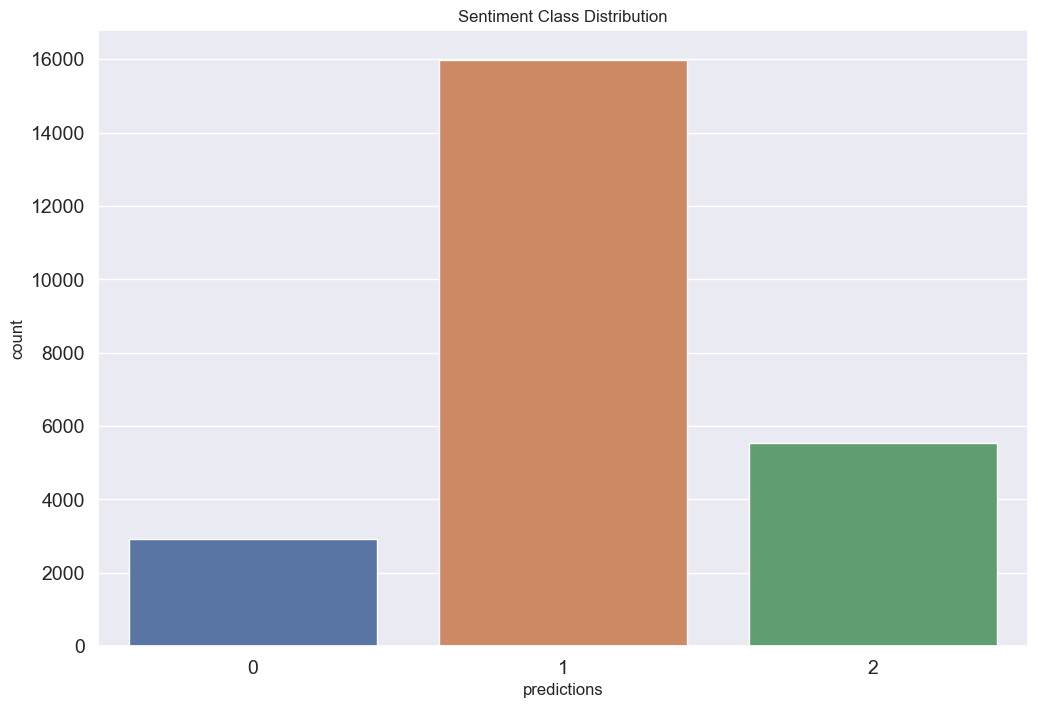

In [314]:
# bar chart of predictions

sns.countplot(x='predictions', data=df)
plt.title('Sentiment Class Distribution')
plt.show()


In [61]:
df.head(1)

,Datetime,Tweet Id,Text,Username,tweet_type,clean_tweets,lemmatized_tweets,stopwords_removed,logits,predictions
0,2023-06-29 16:20:19,1674452749378002945,@mwseibel Yup,elonmusk,Mention Tweet,mwseibel Yup,mwseibel Yup,mwseibel Yup,"[-0.601843, 1.1921415, -0.32749623]",1


<Figure size 1200x800 with 0 Axes>

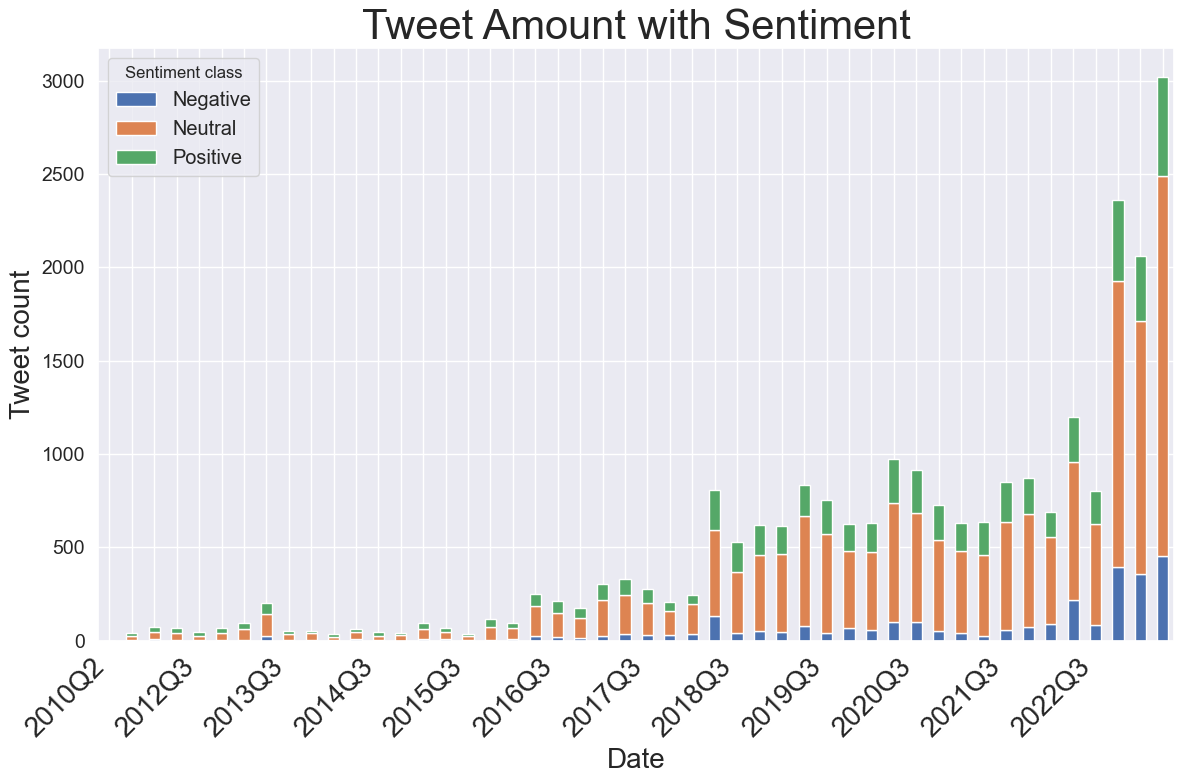

In [322]:
 #? time series of sentiment
#? Resample data by quarter and calculate the mean sentiment score for each day


from tkinter import font


df_q = df.copy()
df_q['Datetime'] = pd.to_datetime(df_q['Datetime']).dt.to_period('Q')

daily_sentiment = df_q.groupby([pd.Grouper(key='Datetime'), 'predictions']).size().unstack().fillna(0)

# plotting
plt.figure(figsize=(12, 8))
ax = daily_sentiment.plot(kind='bar', stacked=True)
plt.title('Tweet Amount with Sentiment', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Tweet count', fontsize=20)
# change fontsize for legend
plt.legend(title='Sentiment class', labels=['Negative', 'Neutral', 'Positive'], fontsize='large')  # update labels as per your data


# Show every fourth xticklabel
for i, label in enumerate(ax.xaxis.get_ticklabels()):
    if i % 4 != 0:
        label.set_visible(False)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


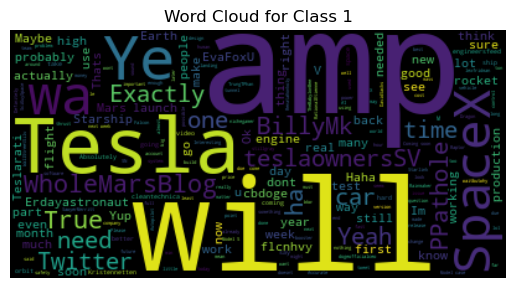

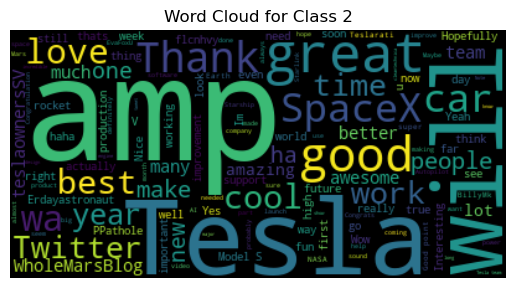

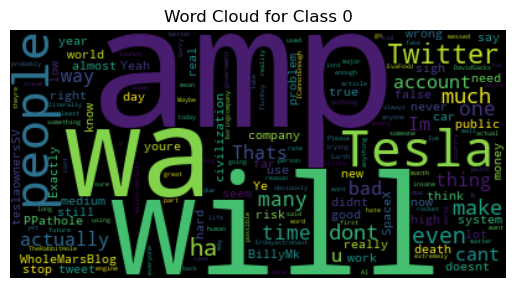

In [64]:
 #? wordcloud
from wordcloud import WordCloud

# For each class
for label in df['predictions'].unique():
    text = ' '.join(df[df['predictions'] == label]['lemmatized_tweets'])
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for Class {label}')
    plt.show()


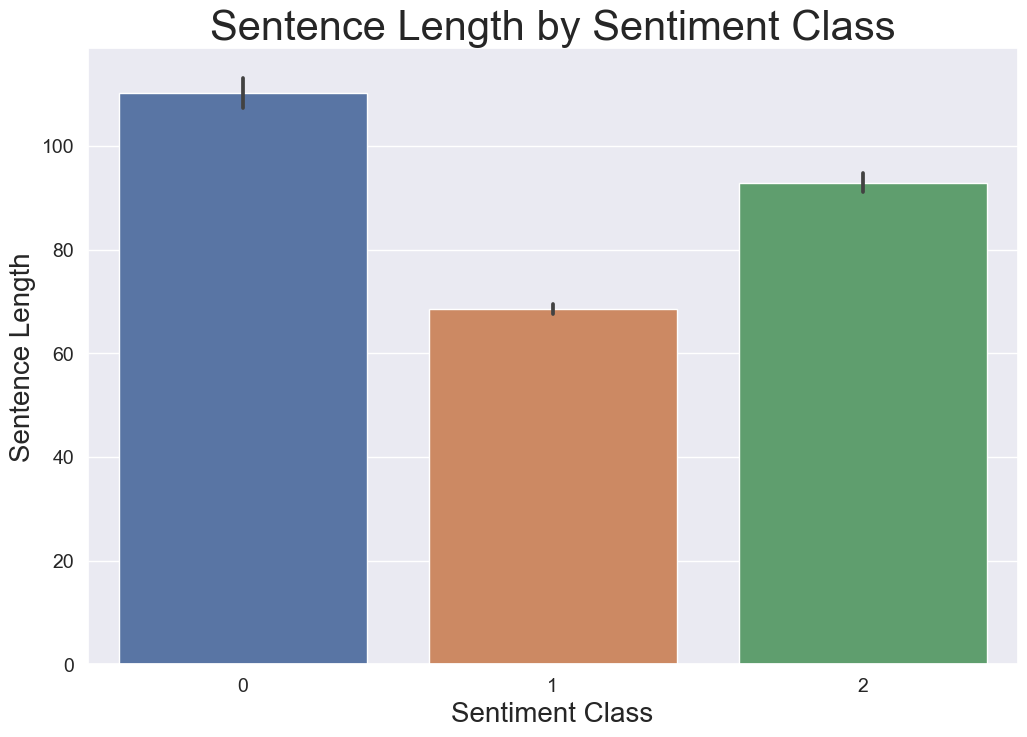

In [324]:
 #? calculate text_length

# Calculate the length of each tweet and store it in a new column
df['text_length'] = df['Text'].apply(len) 
 
#? textlength vs sentiment
sns.barplot(x='predictions', y='text_length', data=df)
plt.title('Sentence Length by Sentiment Class', fontsize=30)
plt.xlabel('Sentiment Class', fontsize=20)
plt.ylabel('Sentence Length', fontsize=20)
plt.show()

#### Time Series Decomposition

In [66]:
df.head(1)

,Datetime,Tweet Id,Text,Username,tweet_type,clean_tweets,lemmatized_tweets,stopwords_removed,logits,predictions,text_length
0,2023-06-29 16:20:19,1674452749378002945,@mwseibel Yup,elonmusk,Mention Tweet,mwseibel Yup,mwseibel Yup,mwseibel Yup,"[-0.601843, 1.1921415, -0.32749623]",1,13


In [67]:
# Make sure 'Datetime' is in datetime format and set as index
df_datetime = df.copy()
df_datetime['Datetime'] = pd.to_datetime(df_datetime['Datetime'])
df_datetime.set_index('Datetime', inplace=True)

In [68]:
df.head(1)

,Datetime,Tweet Id,Text,Username,tweet_type,clean_tweets,lemmatized_tweets,stopwords_removed,logits,predictions,text_length
0,2023-06-29 16:20:19,1674452749378002945,@mwseibel Yup,elonmusk,Mention Tweet,mwseibel Yup,mwseibel Yup,mwseibel Yup,"[-0.601843, 1.1921415, -0.32749623]",1,13


<Figure size 1200x800 with 0 Axes>

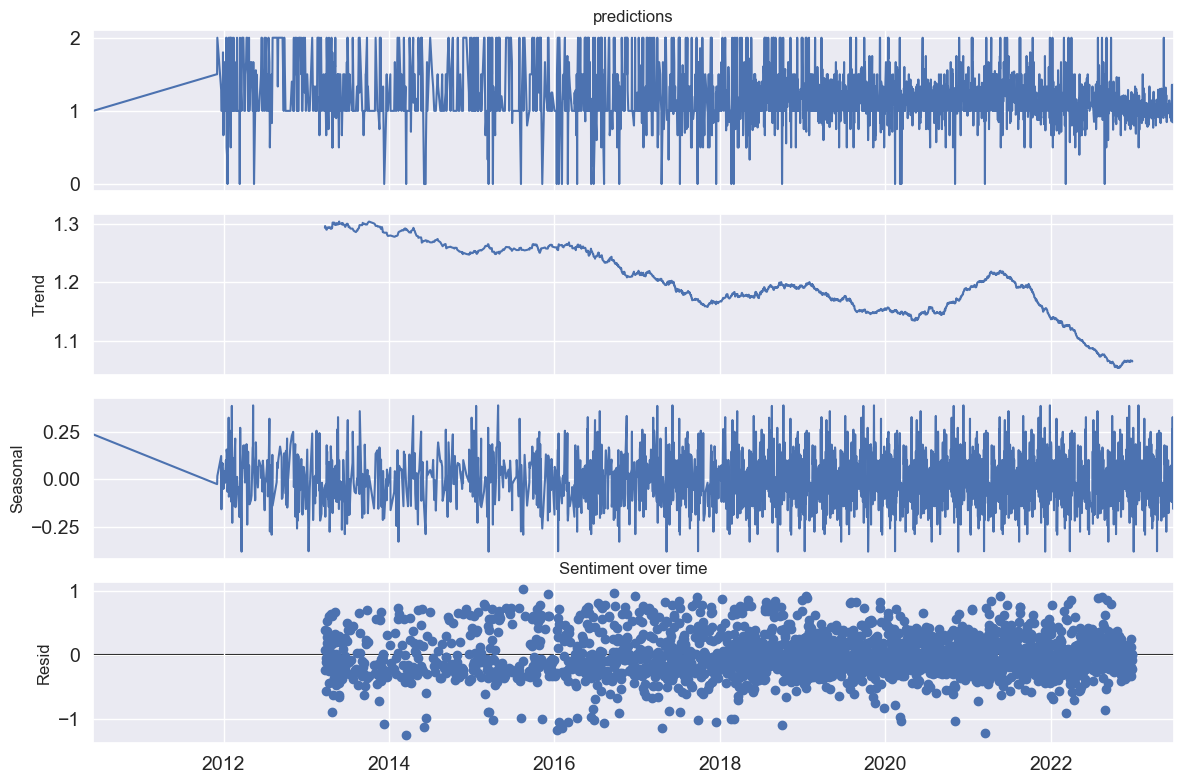

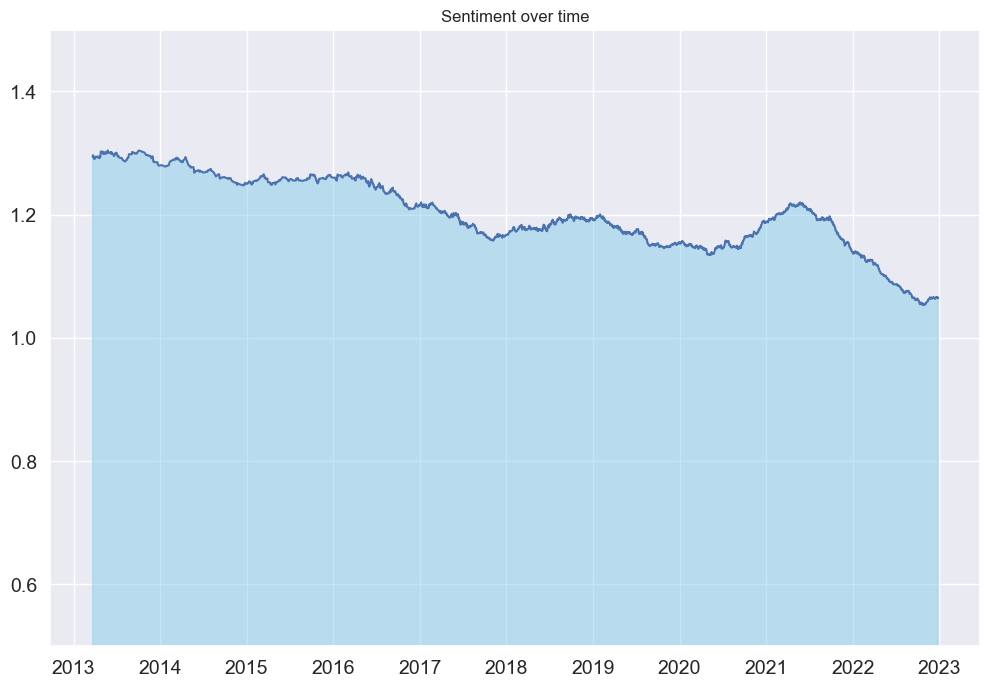

Looking at a period interval of 365 days, we can see that the trend is going down. This means that the sentiment is getting more neutral over time. This is also shown in the next graph.
This basically shows that his tweets are getting more neutral over time. Maybe indicating that he is limiting himself.


In [311]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(12, 8))

# Resample data by day and calculate the mean sentiment score for each day
daily_sentiment = df_datetime['predictions'].resample('D').mean()

# Explicitly set the frequency of the DatetimeIndex
daily_sentiment = daily_sentiment.asfreq('D')

# Decompose time series
result = seasonal_decompose(daily_sentiment.dropna(), model='additive', period=365)

# Plot the original data, the trend, the seasonality, and the residuals 
result.plot()
# add title
plt.title('Sentiment over time')
plt.show()
# Plot only the trend
plt.plot(result.trend.index, result.trend.values)
plt.title('Sentiment over time')
plt.fill_between(result.trend.index, result.trend.values, color='skyblue', alpha=0.5)
plt.ylim(0.5, 1.5)
plt.show()
print("Looking at a period interval of 365 days, we can see that the trend is going down. This means that the sentiment is getting more neutral over time. This is also shown in the next graph.")
print("This basically shows that his tweets are getting more neutral over time. Maybe indicating that he is limiting himself.")



#### Text complexity VS sentiment

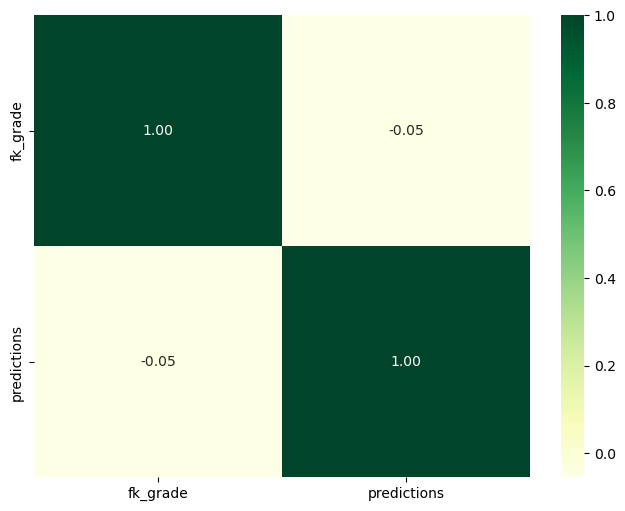

In [70]:
from textstat import flesch_kincaid_grade
import pandas as pd

# Assuming df is your DataFrame with a 'tweet' column for the tweets and 'predictions' for sentiment
df['fk_grade'] = df['Text'].apply(flesch_kincaid_grade)

# Calculate correlation
correlation_matrix = df[['fk_grade', 'predictions']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', fmt=".2f")
plt.show()


## Sentiment Analysis

### Next Steps in Analysis

#### Sentiment Analysis
- **Description**: Classify each tweet as positive, negative, or neutral based on the processed text.
- **Pros**: Directly addresses your goal of sentiment analysis. Easy to interpret.
- **Cons**: May not capture nuanced emotions or sarcasm.

#### Topic Modeling
- **Description**: Discover the hidden thematic structure in the tweet corpus.
- **Pros**: Can reveal insights about what topics Elon Musk commonly tweets about.
- **Cons**: Topics may be hard to interpret. Requires tuning.

#### Time Series Analysis
- **Description**: Analyze the sentiments or topics over time to observe trends or patterns.
- **Pros**: Can reveal how sentiments or topics have evolved.
- **Cons**: Requires a well-preprocessed and well-modeled dataset. Can be computationally intensive.

#### Clustering
- **Description**: Group tweets into clusters based on similarity.
- **Pros**: Can reveal groups of tweets that are similar, useful for finding patterns.
- **Cons**: Requires choosing the right number of clusters and distance metric, which can be challenging.

#### Named Entity Recognition (NER)
- **Description**: Identify entities like companies, locations, etc., in the tweets.
- **Pros**: Can provide additional context to the tweets, helping in more nuanced analysis.
- **Cons**: May require additional preprocessing and training.

#### Emoji Analysis
- **Description**: Analyze the emojis used in the tweets for additional sentiment clues.
- **Pros**: Emojis can provide extra information on sentiment.
- **Cons**: Requires specialized preprocessing. Limited to tweets that actually use emojis.



### Network Graph

In [88]:
df.head(1)

,Datetime,Tweet Id,Text,Username,tweet_type,clean_tweets,lemmatized_tweets,stopwords_removed,logits,predictions,text_length,fk_grade,mentions,hashtags,clean_text,clean_text_ner
0,2023-06-29 16:20:19,1674452749378002945,@mwseibel Yup,elonmusk,Mention Tweet,mwseibel Yup,mwseibel Yup,mwseibel Yup,"[-0.601843, 1.1921415, -0.32749623]",1,13,2.9,[mwseibel],[],mwseibel yup,mwseibel yup


In [71]:
import networkx as nx
import matplotlib.pyplot as plt
import re
from collections import Counter
from itertools import chain

# Extract mentions and hashtags from tweets
df['mentions'] = df['Text'].apply(lambda x: re.findall(r'@(\w+)', x))
df['hashtags'] = df['Text'].apply(lambda x: re.findall(r'#(\w+)', x))


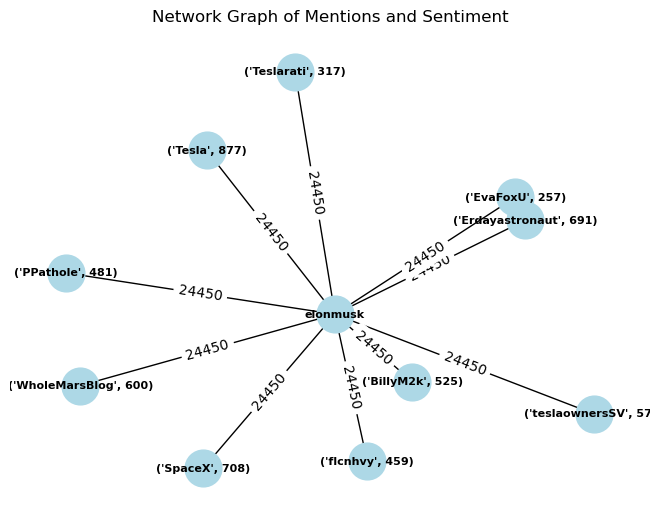

In [289]:
 #? Initialize an empty graph
G = nx.Graph()

#? Flatten list of lists to single list
flat_mentions = list(chain.from_iterable(df['mentions']))

#? Create counter
mentions_counter = Counter(flat_mentions)

#? Populate the graph with edges based on mentions and their corresponding 

for index, row in df.iterrows():
    user = row['Username']
    mentions = mentions_counter.most_common(10)
    sentiment = row['predictions'] 
    
    for mention in mentions:
        if G.has_edge(user, mention):
            # Update edge data if edge already exists
            G[user][mention]['weight'] += 1
            G[user][mention]['sentiment'].append(sentiment)
        else:
            # Add new edge otherwise
            G.add_edge(user, mention, weight=1, sentiment=[sentiment])

#? Draw the graph
pos = nx.spring_layout(G)
labels = {e: G.edges[e]['weight'] for e in G.edges}
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Network Graph of Mentions and Sentiment')
plt.show()


In [77]:
df.head(1)

,Datetime,Tweet Id,Text,Username,tweet_type,clean_tweets,lemmatized_tweets,stopwords_removed,logits,predictions,text_length,fk_grade,mentions,hashtags
0,2023-06-29 16:20:19,1674452749378002945,@mwseibel Yup,elonmusk,Mention Tweet,mwseibel Yup,mwseibel Yup,mwseibel Yup,"[-0.601843, 1.1921415, -0.32749623]",1,13,2.9,[mwseibel],[]


In [285]:
print(df['logits'].head())

0    [-0.601843, 1.1921415, -0.32749623]
1    [-0.993773, 1.4597301, -0.44921634]
2    [-0.5960817, 0.6616785, -0.3684216]
3    [-1.811511, 1.751999, -0.066021256]
4      [-2.657178, 0.5405852, 2.5614333]
Name: logits, dtype: object


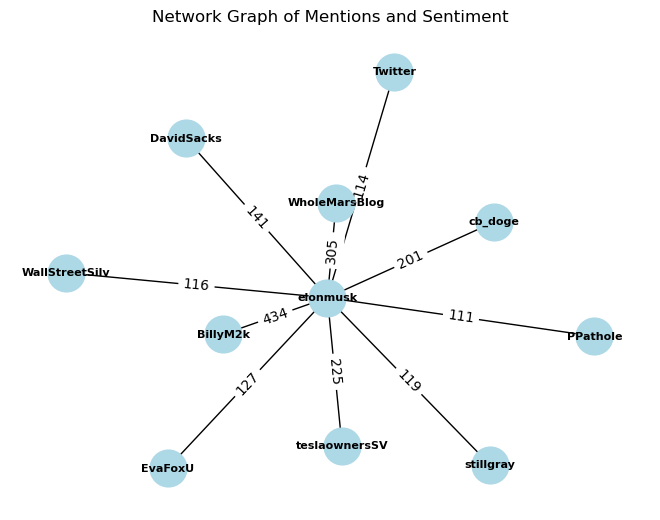

In [293]:
# Initialize an empty graph
G = nx.Graph()

df_after_twitter = df.copy()
## select only rows after 2022-04-14
df_after_twitter = df_after_twitter[df_after_twitter['Datetime'] > '2022-04-14']

# Flatten list of lists to single list
flat_mentions = list(chain.from_iterable(df_after_twitter['mentions']))

# Create counter for top 10 mentions
mentions_counter = Counter(flat_mentions)
top_mentions = [mention[0] for mention in mentions_counter.most_common(10)]

# Populate the graph with edges based on mentions and their corresponding sentiment
for index, row in df_after_twitter.iterrows():
    user = row['Username']
    mentions = row['mentions']
    sentiment = row['predictions']  # Assuming 2 is positive, 1 is neutral, 0 is negative
    
    for mention in mentions:
        if mention not in top_mentions:
            continue
        if G.has_edge(user, mention):
            # Update edge data if edge already exists
            G[user][mention]['weight'] += 1
            G[user][mention]['sentiment'].append(sentiment)
        else:
            # Add new edge otherwise
            G.add_edge(user, mention, weight=1, sentiment=[sentiment])

# Calculate average sentiment for each edge
for u, v, data in G.edges(data=True):
    data['average_sentiment'] = sum(data['sentiment']) / len(data['sentiment'])

# Draw the graph
pos = nx.spring_layout(G)
labels = {e: G.edges[e]['weight'] for e in G.edges}
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Network Graph of Mentions and Sentiment')
plt.show()



/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/776152442.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('RdYlGn')
/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/776152442.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0, 2), cmap=color_map))


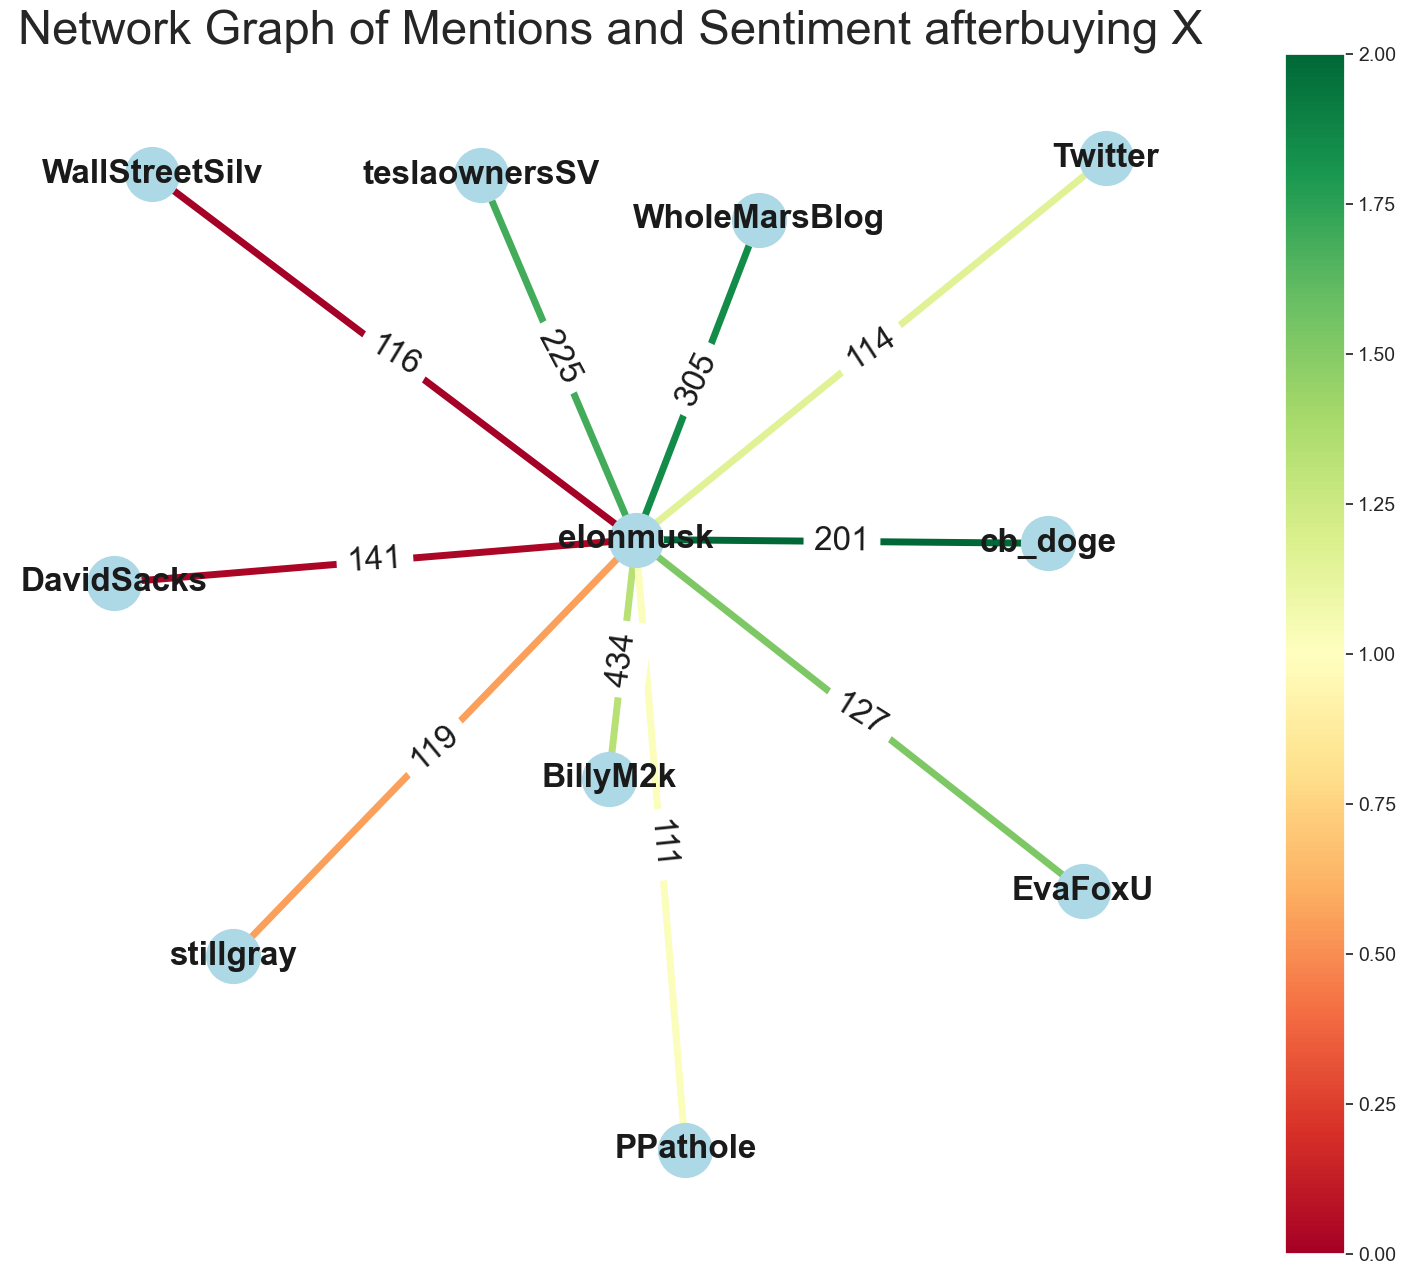

In [327]:
plt.figure(figsize=(15, 12))  # Increase figure size

# Draw the graph
pos = nx.spring_layout(G)
edge_colors = [data['average_sentiment'] for _, _, data in G.edges(data=True)]
labels = {e: G.edges[e]['weight'] for e in G.edges}

# Map average_sentiment to a color
color_map = plt.cm.get_cmap('RdYlGn')
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=edge_colors, edge_cmap=color_map,
        font_weight='bold', node_size=1500, font_size=24, width=5)  # Increase node_size, font_size, and edge width
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=24)  # Increase font_size for edge labels

plt.title('Network Graph of Mentions and Sentiment afterbuying X', fontsize=34)  # Increase title font size
plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0, 2), cmap=color_map))
plt.show()


### Top10 mentions sentiment

/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/4093262264.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Datetime'] = pd.to_datetime(df_filtered['Datetime'])
/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/4093262264.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped_monthly = df_grouped.groupby('mentions').resample('Q').mean().reset_index()
/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/4093262264.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.

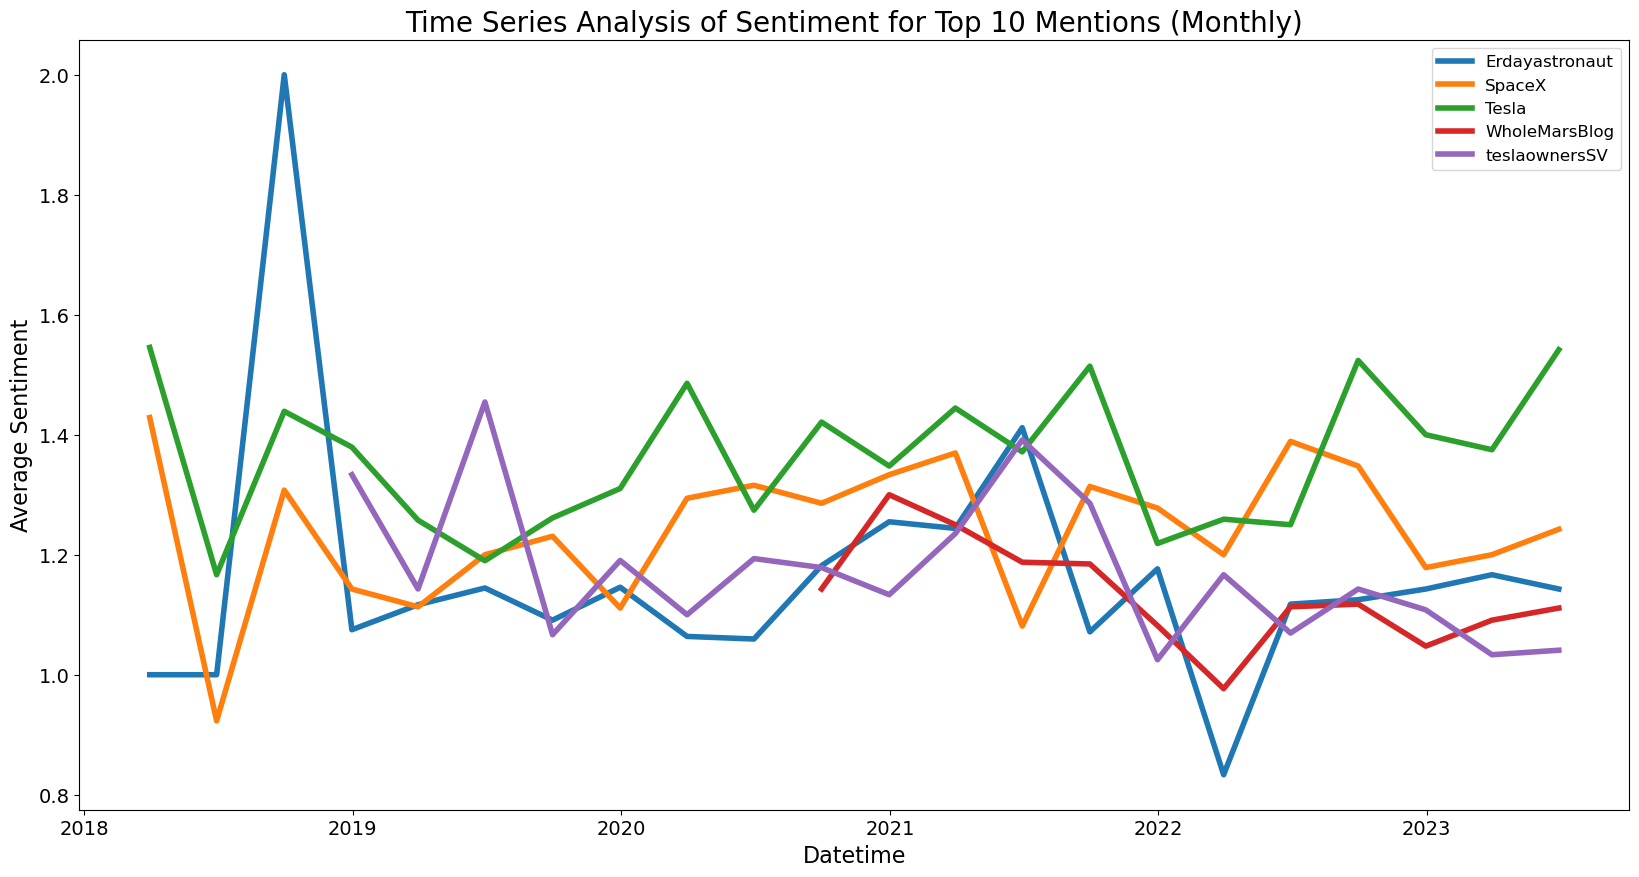

In [78]:
# Given that I have the structure of the dataframe, let's correct the code for further analysis.

# Flatten the mentions and repeat the other columns (Datetime, predictions) accordingly
df_exploded = df.explode('mentions')

# Flatten list of lists to single list
flat_mentions = list(chain.from_iterable(df['mentions']))

# Create counter
mentions_counter = Counter(flat_mentions)

# Get only the mentions and not their counts for filtering
top_10_mentions = [mention for mention, count in mentions_counter.most_common(5)]

# Filter to include only top 10 mentions
df_filtered = df_exploded[df_exploded['mentions'].isin(top_10_mentions)]

# Convert 'Datetime' to datetime type for proper plotting
df_filtered['Datetime'] = pd.to_datetime(df_filtered['Datetime'])

# Group by date and mention, then average the sentiment
df_grouped = df_filtered.groupby(['Datetime', 'mentions'])['predictions'].mean().reset_index()

# Set Datetime as the index
df_grouped.set_index('Datetime', inplace=True)

# Resample by month and take the mean
df_grouped_monthly = df_grouped.groupby('mentions').resample('Q').mean().reset_index()

# Filter to only include data from 2018 and onwards
df_grouped_monthly['Datetime'] = pd.to_datetime(df_grouped_monthly['Datetime'])
df_grouped_monthly = df_grouped_monthly[df_grouped_monthly['Datetime'].dt.year >= 2018]

# Plotting with enhanced visuals
plt.figure(figsize=(20, 10))  # Increase figure size
for mention, group in df_grouped_monthly.groupby('mentions'):
    plt.plot(group['Datetime'], group['predictions'], label=mention, linewidth=4)  # Increase linewidth

plt.title('Time Series Analysis of Sentiment for Top 10 Mentions (Monthly)', fontsize=20)  # Increase title fontsize
plt.xlabel('Datetime', fontsize=16)  # Increase x-axis label fontsize
plt.ylabel('Average Sentiment', fontsize=16)  # Increase y-axis label fontsize
plt.xticks(fontsize=14)  # Increase x-axis tick fontsize
plt.yticks(fontsize=14)  # Increase y-axis tick fontsize
plt.legend(fontsize=12)  # Increase legend fontsize
plt.show()




#### top 10 since 2018

/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/2766585379.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped_monthly = df_grouped.groupby('mentions').resample('M').mean().reset_index()
/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/2766585379.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped_monthly = df_grouped.groupby('mentions').resample('M').mean().reset_index()
/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/2766585379.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a futur

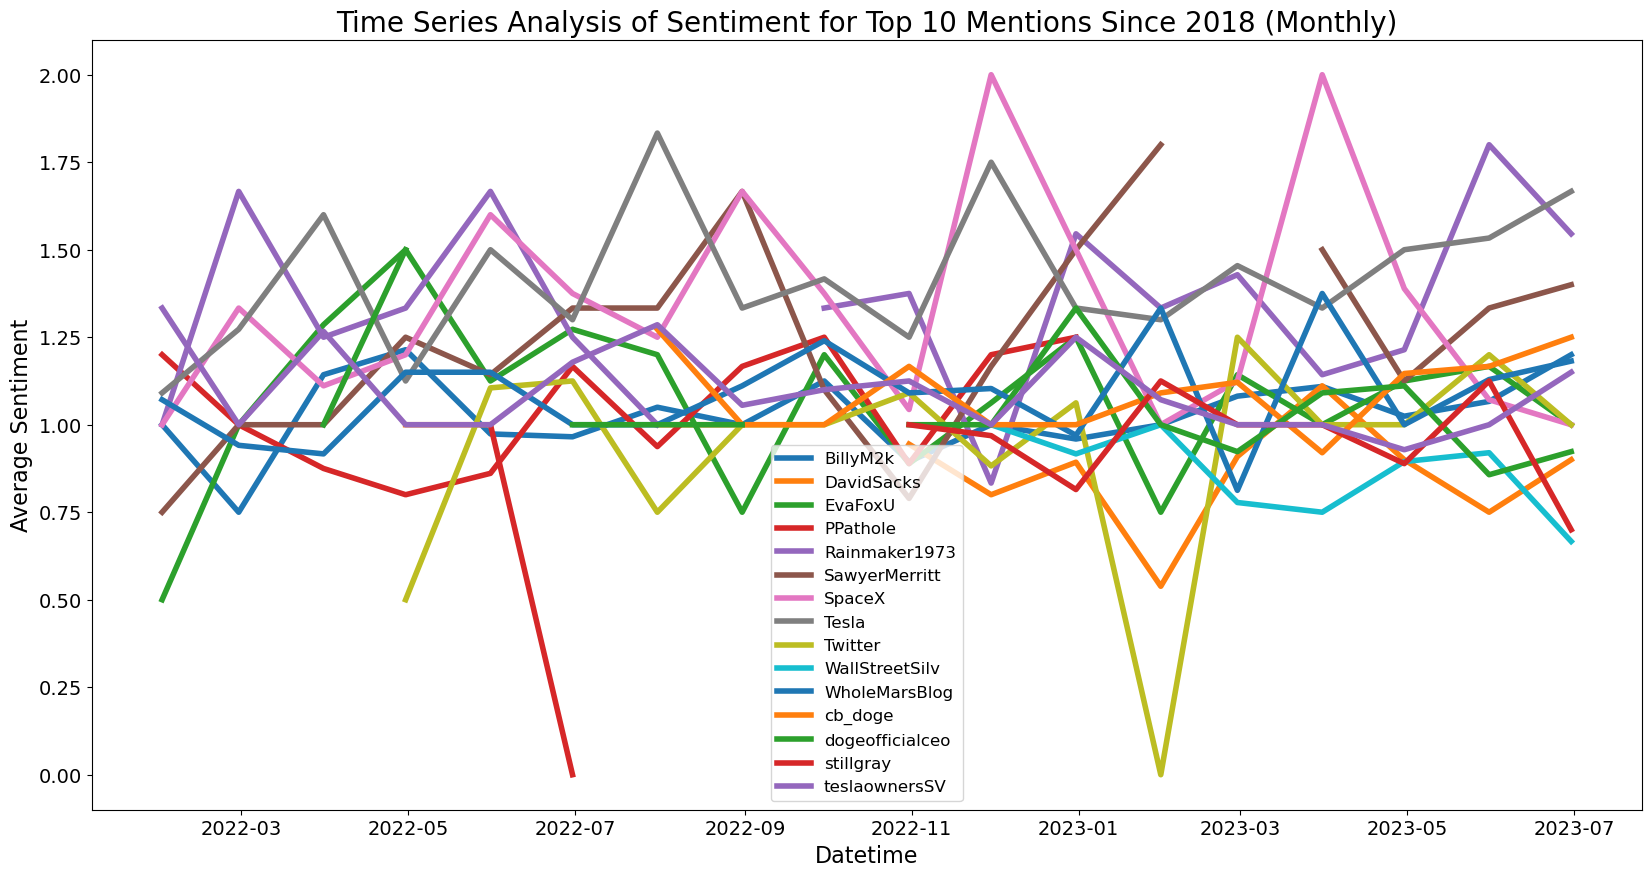

In [79]:
# Convert 'Datetime' to datetime type if it's not
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Filter to only include data from 2018 and onwards
df_2018_onwards = df[df['Datetime'].dt.year >= 2022]

# Flatten the mentions for the filtered data
flat_mentions = list(chain.from_iterable(df_2018_onwards['mentions']))

# Create counter for the filtered mentions
mentions_counter = Counter(flat_mentions)

# Get only the mentions and not their counts for filtering
top_10_mentions = [mention for mention, count in mentions_counter.most_common(15)]

# Filter to include only top 10 mentions
df_exploded = df_2018_onwards.explode('mentions')
df_filtered = df_exploded[df_exploded['mentions'].isin(top_10_mentions)]

# Group by date and mention, then average the sentiment
df_grouped = df_filtered.groupby(['Datetime', 'mentions'])['predictions'].mean().reset_index()

# Resample by month and take the mean
df_grouped.set_index('Datetime', inplace=True)
df_grouped_monthly = df_grouped.groupby('mentions').resample('M').mean().reset_index()

# Plotting with enhanced visuals
plt.figure(figsize=(20, 10))
for mention, group in df_grouped_monthly.groupby('mentions'):
    plt.plot(group['Datetime'], group['predictions'], label=mention, linewidth=4)

plt.title('Time Series Analysis of Sentiment for Top 10 Mentions Since 2018 (Monthly)', fontsize=20)
plt.xlabel('Datetime', fontsize=16)
plt.ylabel('Average Sentiment', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.show()


#### Doge Commentators

/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/3687846735.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Datetime'] = pd.to_datetime(df_filtered['Datetime'])
/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/3687846735.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped_monthly = df_grouped.groupby('mentions').resample('Q').mean().reset_index()
/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/3687846735.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.

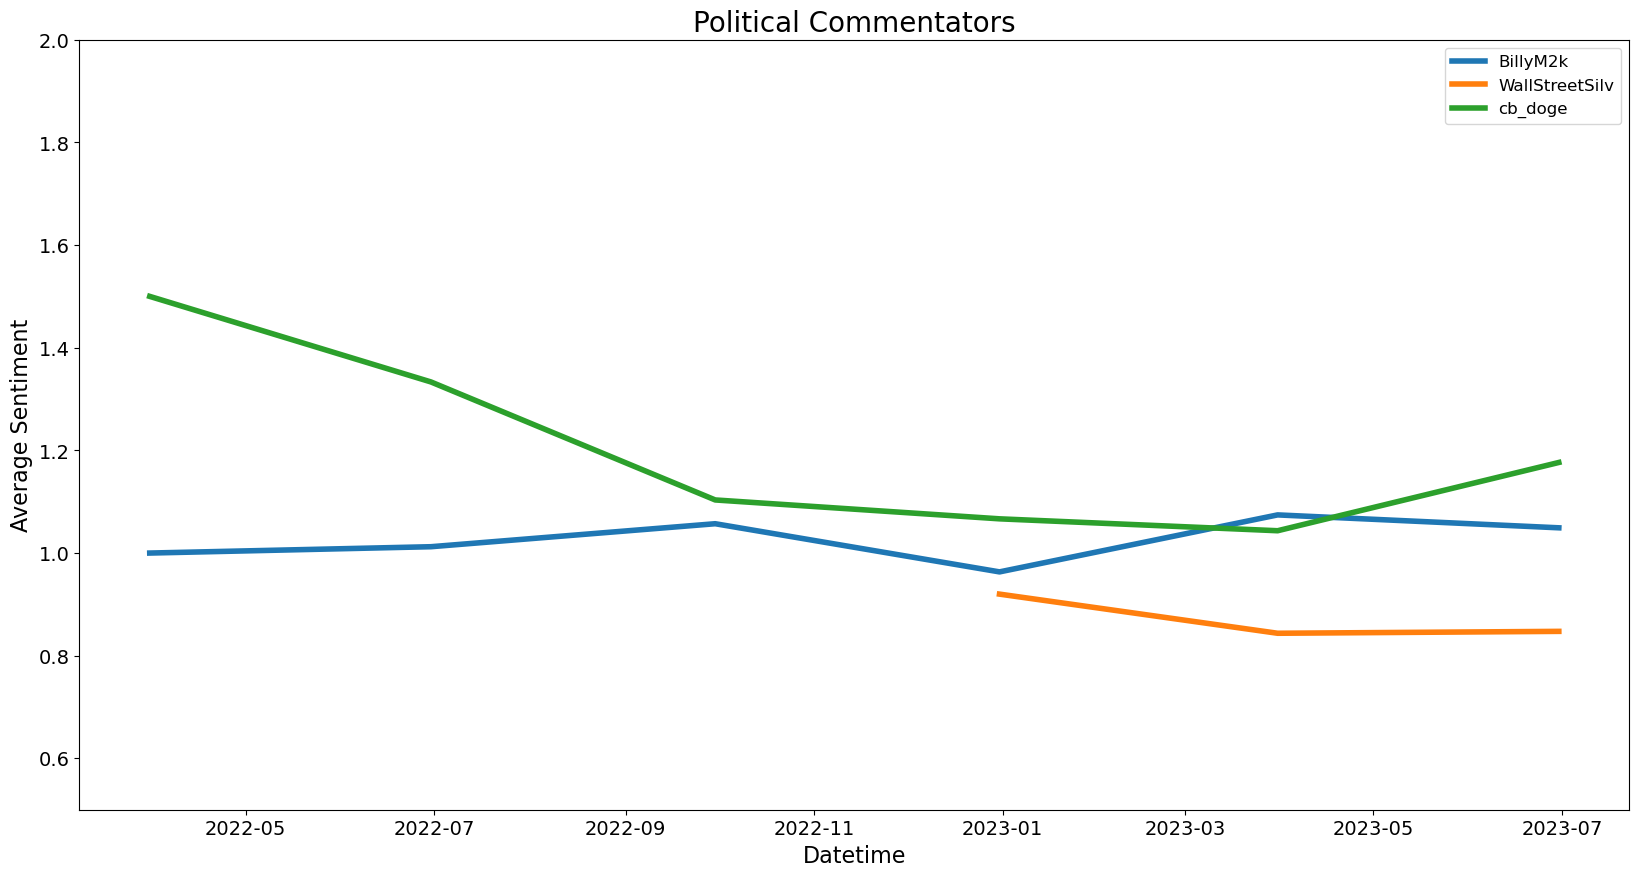

In [80]:
 #? Flatten the mentions and
df_exploded = df.explode('mentions')

#? Flatten list of lists to single list
flat_mentions = list(chain.from_iterable(df['mentions']))

#? Create counter
mentions_counter = Counter(flat_mentions)

#? Get only the mentions and not their counts for filtering
selected_mentions = ["BillyM2k", "cb_doge", "WallStreetSilv"]

#? Filter to include only top 10 mentions
df_filtered = df_exploded[df_exploded['mentions'].isin(selected_mentions)]

#? 'Datetime' to datetime type to ensure proper plotting ALREADY is but just to be sure
df_filtered['Datetime'] = pd.to_datetime(df_filtered['Datetime'])

#? Group by date and mention, then average the sentiment
df_grouped = df_filtered.groupby(['Datetime', 'mentions'])['predictions'].mean().reset_index()

#? Set Datetime as the index
df_grouped.set_index('Datetime', inplace=True)

#? Resample and take the mean
df_grouped_monthly = df_grouped.groupby('mentions').resample('Q').mean().reset_index()

#? Filter to only include data from 2018 and onwards
df_grouped_monthly['Datetime'] = pd.to_datetime(df_grouped_monthly['Datetime'])
df_grouped_monthly = df_grouped_monthly[df_grouped_monthly['Datetime'].dt.year >= 2022]

#? Plotting
plt.figure(figsize=(20, 10))  # Increase figure size
for mention, group in df_grouped_monthly.groupby('mentions'):
    plt.plot(group['Datetime'], group['predictions'], label=mention, linewidth=4)  # linewidth

#todo Time Series Analysis of Sentiment
plt.title('DOGE Commentators', fontsize=20)  # title
plt.xlabel('Datetime', fontsize=16)  # x-axis label fontsize
plt.ylabel('Average Sentiment', fontsize=16)  # y-axis label fontsize
plt.ylim(0.5, 2)
plt.xticks(fontsize=14)  # x-axis tick fontsize
plt.yticks(fontsize=14)  # y-axis tick fontsize
plt.legend(fontsize=12)  # legend fontsize
plt.show()




### political commentators

/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/3809869945.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Datetime'] = pd.to_datetime(df_filtered['Datetime'])
/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/3809869945.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped_monthly = df_grouped.groupby('mentions').resample('Q').mean().reset_index()
/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/3809869945.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.

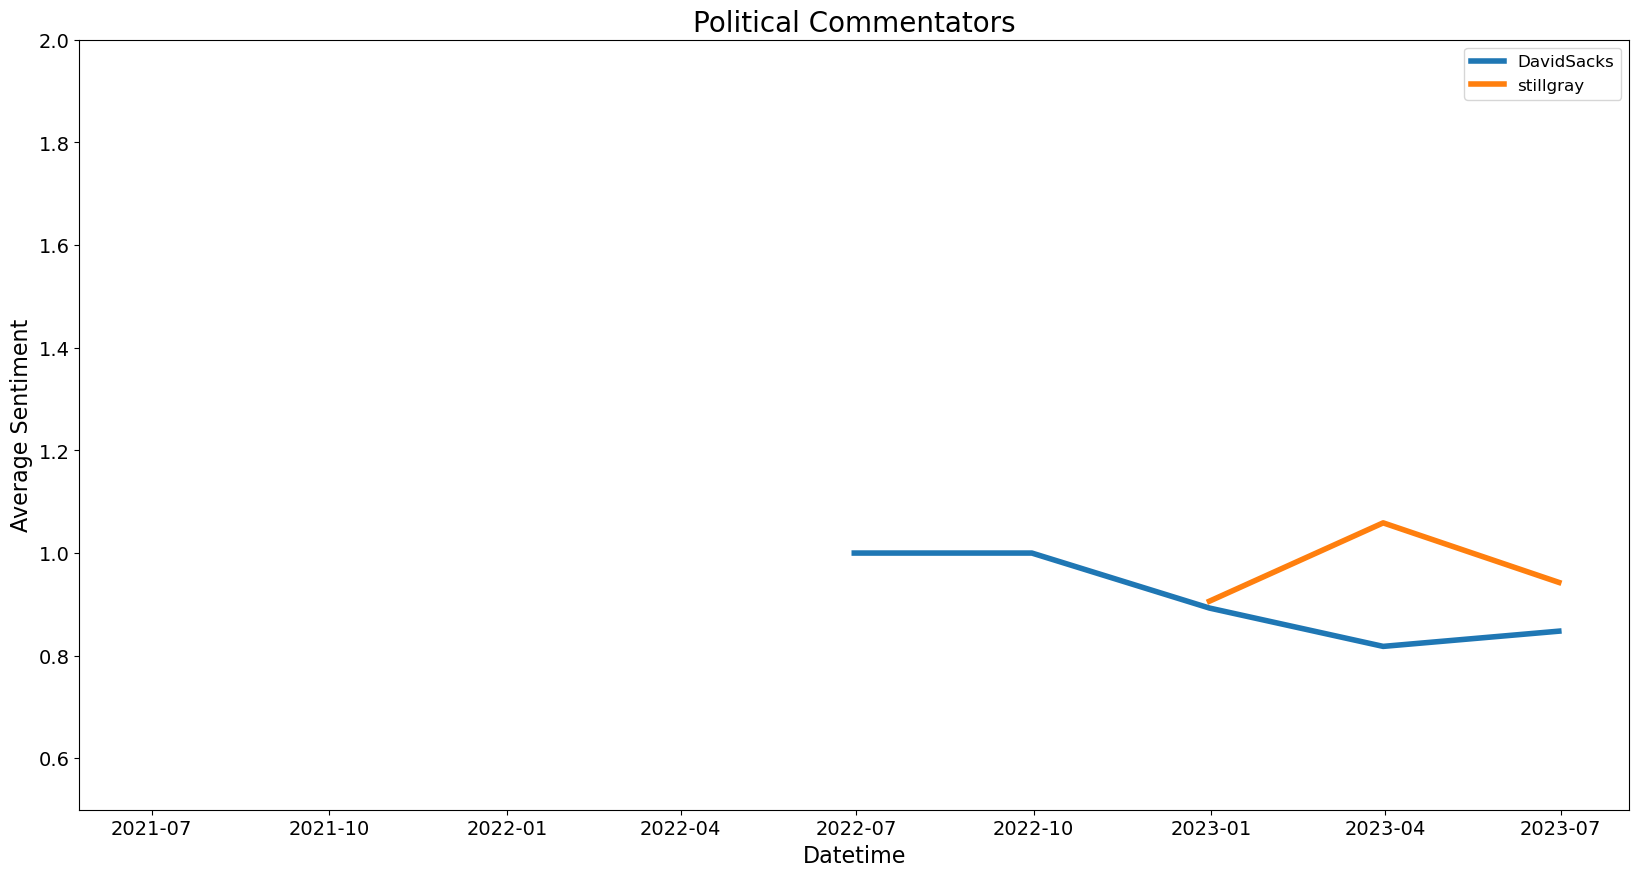

In [81]:
 #? Flatten the mentions and
df_exploded = df.explode('mentions')

#? Flatten list of lists to single list
flat_mentions = list(chain.from_iterable(df['mentions']))

#? Create counter
mentions_counter = Counter(flat_mentions)

#? Get only the mentions and not their counts for filtering
selected_mentions = ["DavidSacks", "stillgray"]

#? Filter to include only top 10 mentions
df_filtered = df_exploded[df_exploded['mentions'].isin(selected_mentions)]

#? 'Datetime' to datetime type to ensure proper plotting ALREADY is but just to be sure
df_filtered['Datetime'] = pd.to_datetime(df_filtered['Datetime'])

#? Group by date and mention, then average the sentiment
df_grouped = df_filtered.groupby(['Datetime', 'mentions'])['predictions'].mean().reset_index()

#? Set Datetime as the index
df_grouped.set_index('Datetime', inplace=True)

#? Resample and take the mean
df_grouped_monthly = df_grouped.groupby('mentions').resample('Q').mean().reset_index()

#? Filter to only include data from 2018 and onwards
df_grouped_monthly['Datetime'] = pd.to_datetime(df_grouped_monthly['Datetime'])
df_grouped_monthly = df_grouped_monthly[df_grouped_monthly['Datetime'].dt.year >= 2018]

#? Plotting
plt.figure(figsize=(20, 10))  # Increase figure size
for mention, group in df_grouped_monthly.groupby('mentions'):
    plt.plot(group['Datetime'], group['predictions'], label=mention, linewidth=4)  # linewidth

#todo Time Series Analysis of Sentiment
plt.title('Political Commentators', fontsize=20)  # title
plt.xlabel('Datetime', fontsize=16)  # x-axis label fontsize
plt.ylabel('Average Sentiment', fontsize=16)  # y-axis label fontsize
plt.ylim(0.5, 2)
plt.xticks(fontsize=14)  # x-axis tick fontsize
plt.yticks(fontsize=14)  # y-axis tick fontsize
plt.legend(fontsize=12)  # legend fontsize
plt.show()

#### companies

/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/2868647244.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Datetime'] = pd.to_datetime(df_filtered['Datetime'])
/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/2868647244.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped_monthly = df_grouped.groupby('mentions').resample('Q').mean().reset_index()
/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/2868647244.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.

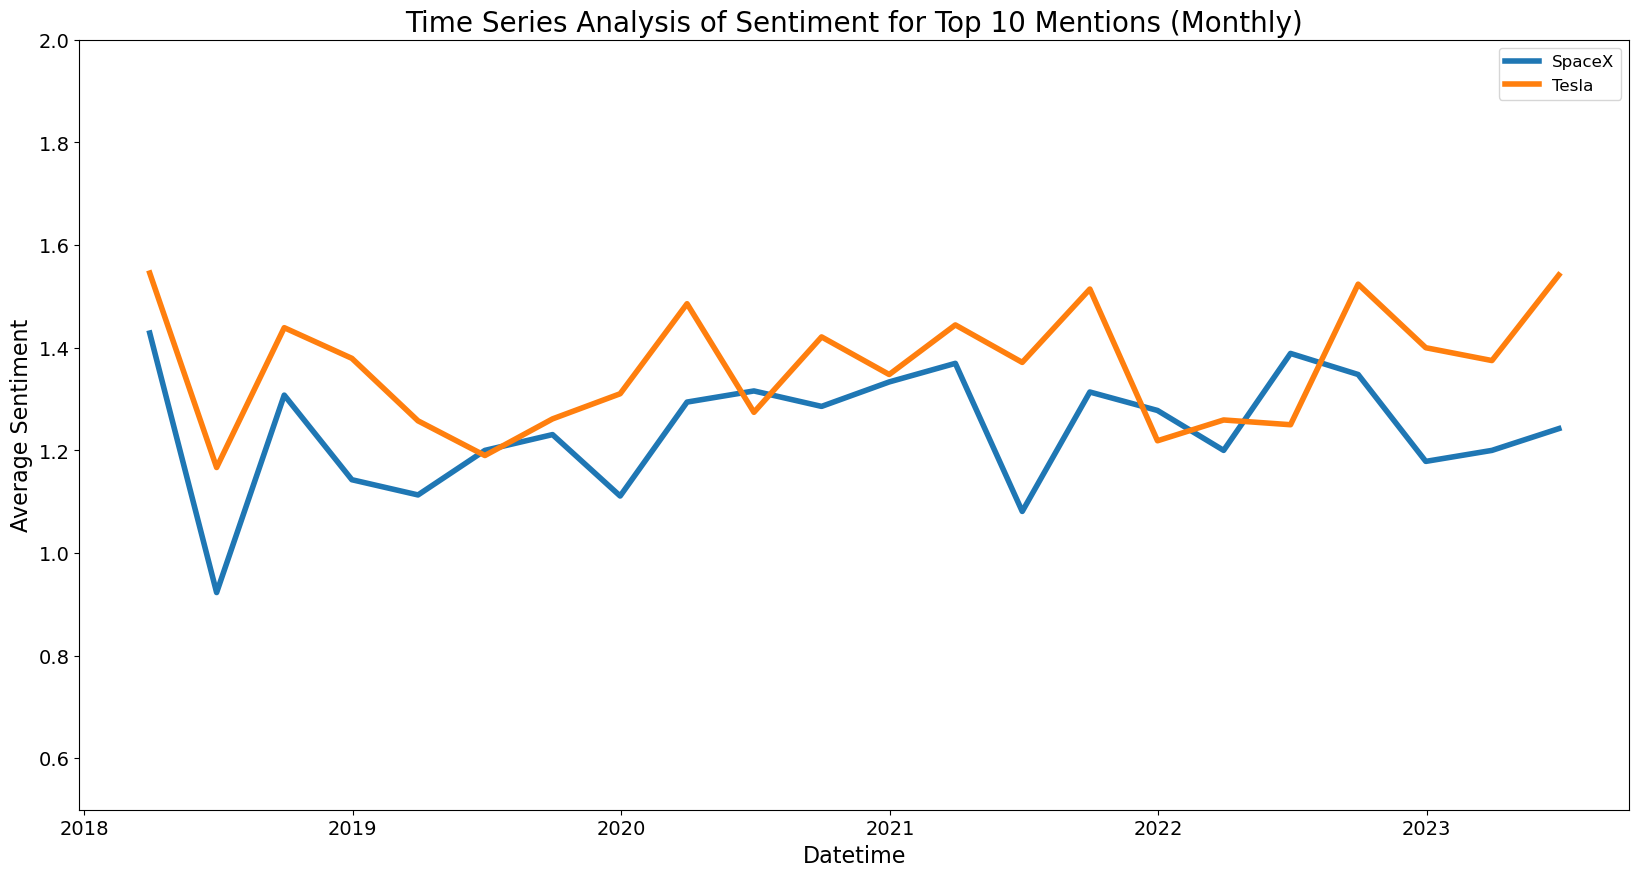

In [82]:
 #? Flatten the mentions and
df_exploded = df.explode('mentions')

#? Flatten list of lists to single list
flat_mentions = list(chain.from_iterable(df['mentions']))

#? Create counter
mentions_counter = Counter(flat_mentions)

#? Get only the mentions and not their counts for filtering
selected_mentions = ["Tesla", "SpaceX"]

#? Filter to include only top 10 mentions
df_filtered = df_exploded[df_exploded['mentions'].isin(selected_mentions)]

#? 'Datetime' to datetime type to ensure proper plotting ALREADY is but just to be sure
df_filtered['Datetime'] = pd.to_datetime(df_filtered['Datetime'])

#? Group by date and mention, then average the sentiment
df_grouped = df_filtered.groupby(['Datetime', 'mentions'])['predictions'].mean().reset_index()

#? Set Datetime as the index
df_grouped.set_index('Datetime', inplace=True)

#? Resample and take the mean
df_grouped_monthly = df_grouped.groupby('mentions').resample('Q').mean().reset_index()

#? Filter to only include data from 2018 and onwards
df_grouped_monthly['Datetime'] = pd.to_datetime(df_grouped_monthly['Datetime'])
df_grouped_monthly = df_grouped_monthly[df_grouped_monthly['Datetime'].dt.year >= 2018]

#? Plotting
plt.figure(figsize=(20, 10))  # Increase figure size
for mention, group in df_grouped_monthly.groupby('mentions'):
    plt.plot(group['Datetime'], group['predictions'], label=mention, linewidth=4)  # linewidth

plt.title('Time Series Analysis of Sentiment for Top 10 Mentions (Monthly)', fontsize=20)  # title
plt.xlabel('Datetime', fontsize=16)  # x-axis label fontsize
plt.ylabel('Average Sentiment', fontsize=16)  # y-axis label fontsize
plt.ylim(0.5, 2)
plt.xticks(fontsize=14)  # x-axis tick fontsize
plt.yticks(fontsize=14)  # y-axis tick fontsize
plt.legend(fontsize=12)  # legend fontsize
plt.show()




## Topic Modeling with LDA

### Redoing the preprocessing in a more advanced way

In [102]:
 #? lowercasing which i forgot the first time
df['clean_text'] = df['Text'].str.lower()

In [103]:
 #? Removing special characters and numbers and extra spaces
import re
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())


In [104]:
 #? handle negations
negation_dict = {
    "isn't": "is not",
    "aren't": "are not",
    "wasn't": "was not",
    "weren't": "were not",
    "haven't": "have not",
    "hasn't": "has not",
    "hadn't": "had not",
    "won't": "will not",
    "wouldn't": "would not",
    "don't": "do not",
    "doesn't": "does not",
    "didn't": "did not",
    "can't": "cannot",
    "couldn't": "could not",
    "shouldn't": "should not",
    "mightn't": "might not",
    "mustn't": "must not"
}
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([negation_dict.get(word, word) for word in x.split()]))


In [105]:
 #? Named Entity Regognition
import spacy
nlp = spacy.load("en_core_web_sm")
def process_text(text):
    processed_text = []
    doc = nlp(text)
    for token in doc:
        if any(ent for ent in doc.ents if ent.start == token.i and ent.end == token.i + 1 and ent.label_ in ['PERSON', 'ORG', 'GPE']):
            processed_text.append(token.text.replace(' ', '_'))
        else:
            processed_text.append(token.text)
    return ' '.join(processed_text)

df['clean_text_ner'] = df['clean_text'].apply(process_text)


In [106]:
print(df['clean_text'].tail(10))
print(df['clean_text_ner'].tail(10))
print(df['clean_text_list'].head())


24440    his singing and acting talent will be sorely m...
24441    why does the crowd cry over the glorious leade...
24442    sam harris also wrote a nice piece on the awes...
24443    read lying the new book by my friend sam harri...
24444    am reading a great biography of ben franklin b...
24445                    that was a total non sequitur btw
24446    great voltaire quote arguably better than twai...
24447    i made the volume on the model s httptcowmcntm...
24448    went to iceland on sat to ride bumper cars on ...
24449    please ignore prior tweets as that was someone...
Name: clean_text, dtype: object
24440    his singing and acting talent will be sorely m...
24441    why does the crowd cry over the glorious leade...
24442    sam harris also wrote a nice piece on the awes...
24443    read lying the new book by my friend sam harri...
24444    am reading a great biography of ben franklin b...
24445                    that was a total non sequitur btw
24446    great voltaire 

In [107]:
 #? advanced lemmatization
df['clean_text_ner'] = df['clean_text_ner'].apply(lambda x: ' '.join([token.lemma_ for token in nlp(x)]))

In [113]:
 #? domain specific dict
domain_dict = {
    "Tesla": "TESLA_CO",
    "SpaceX": "SPACEX_CO",
    "Neuralink": "NEURALINK_CO",
    "Elon": "ELON_MUSK",
    "Musk": "ELON_MUSK",
    "Starlink": "STARLINK_SATELLITE",
    "Falcon": "FALCON_ROCKET",
    "Model S": "TESLA_MODEL_S",
    "Model 3": "TESLA_MODEL_3",
    "Model X": "TESLA_MODEL_X",
    "Model Y": "TESLA_MODEL_Y",
    "Cybertruck": "TESLA_CYBERTRUCK",
    "Roadster": "TESLA_ROADSTER",
    "Boring": "BORING_CO",
    "SolarCity": "SOLARCITY_CO",
    "Giga Berlin": "TESLA_GIGA_BERLIN",
    "Giga Texas": "TESLA_GIGA_TEXAS",
    "Dogecoin": "DOGECOIN_CURRENCY",
    "Bitcoin": "BITCOIN_CURRENCY",
    "Mars": "MARS_PLANET",
    "Earth": "EARTH_PLANET",
    "SEC": "US_SEC",
    "EV": "ELECTRIC_VEHICLE"
}
df['clean_text_ner'] = df['clean_text_ner'].apply(lambda x: ' '.join([domain_dict.get(word, word) for word in x.split()]))


In [114]:
 #? remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['clean_text_ner'] = df['clean_text_ner'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [115]:
 #? TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with N-grams (unigrams, bigrams, and trigrams)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_df=0.9, min_df=2, stop_words='english')

# Transform the cleaned text
tfidf = tfidf_vectorizer.fit_transform(df['clean_text_ner'])



### Model Building

#### NMF

In [146]:
from sklearn.decomposition import NMF
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import pandas as pd

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_df=0.9, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['clean_text_ner'])
#* tested:
##* ngram_range=(1, 3), max_df=0.9, min_df=2    coh: 0.44, perplexity: 155

# NMF Model Training
nmf = NMF(n_components=5, init='nndsvd', random_state=0)
W = nmf.fit_transform(tfidf)
H = nmf.components_
#* tested:
##* init='random', random_state=0    coh: 0.44, perplexity: 155


# Coherence
# Convert text data to list of lists
df['clean_text_list'] = df['clean_text_ner'].apply(lambda x: x.split() if isinstance(x, str) else x)

# Create Gensim dictionary and corpus
dictionary = Dictionary(df['clean_text_list'])
corpus = [dictionary.doc2bow(text) for text in df['clean_text_list']]

# Prepare topics for coherence model
topics_nmf = [[tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]] for topic in H]

# Coherence Score
coherence_model = CoherenceModel(topics=topics_nmf, texts=df['clean_text_list'], dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()
print(f"Coherence Score: {coherence}")

# Perplexity
perplexity = nmf.reconstruction_err_
print(f"Perplexity: {perplexity}")

# Topic Distribution for first document
print(f"Topic distribution for first document: {W[0]}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

##### manual grid search to get best params

In [191]:
df.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'tweet_type',
       'clean_tweets', 'lemmatized_tweets', 'stopwords_removed', 'logits',
       'predictions', 'text_length', 'fk_grade', 'mentions', 'hashtags',
       'clean_text', 'clean_text_ner', 'Topic', 'clean_text_list',
       'new_topic'],
      dtype='object')

In [148]:
best_coherence = -1
best_params = None

for max_df in [0.85, 0.9]:
    for min_df in [2, 5]:
        for ngram_range in [(1, 1), (1, 3)]:
            for n_components in [5, 10, 15]:
                for init in ['random', 'nndsvd']:
                    
                    # TF-IDF
                    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_df=max_df, min_df=min_df, stop_words='english')
                    tfidf = tfidf_vectorizer.fit_transform(df['clean_text_ner'])
                    
                    # NMF
                    nmf = NMF(n_components=n_components, init=init, random_state=0)
                    W = nmf.fit_transform(tfidf)
                    H = nmf.components_
                    
                    # Coherence
                    topics_nmf = [[tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]] for topic in H]
                    coherence_model = CoherenceModel(topics=topics_nmf, texts=df['clean_text_list'], dictionary=dictionary, coherence='c_v')
                    coherence = coherence_model.get_coherence()
                    
                    if coherence > best_coherence:
                        best_coherence = coherence
                        best_params = {
                            'max_df': max_df,
                            'min_df': min_df,
                            'ngram_range': ngram_range,
                            'n_components': n_components,
                            'init': init
                        }

print("Best Coherence Score:", best_coherence)
print("Best Parameters:", best_params)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/Users/erikcarlstedt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [150]:
# Best Parameters: {'max_df': 0.85, 'min_df': 2, 'ngram_range': (1, 3), 'n_components': 5, 'init': 'random'}

from sklearn.decomposition import NMF
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import pandas as pd

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_df=0.05, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['clean_text_ner'])
#* tested:
##* ngram_range=(1, 3), max_df=0.9, min_df=2    coh: 0.44, perplexity: 155

# NMF Model Training
nmf = NMF(n_components=5, init='random', random_state=42)
W = nmf.fit_transform(tfidf)
H = nmf.components_
#* tested:
##* init='random', random_state=0    coh: 0.44, perplexity: 155


# Coherence
# Convert text data to list of lists
df['clean_text_list'] = df['clean_text_ner'].apply(lambda x: x.split() if isinstance(x, str) else x)

# Create Gensim dictionary and corpus
dictionary = Dictionary(df['clean_text_list'])
corpus = [dictionary.doc2bow(text) for text in df['clean_text_list']]

# Prepare topics for coherence model
topics_nmf = [[tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]] for topic in H]

# Coherence Score
coherence_model = CoherenceModel(topics=topics_nmf, texts=df['clean_text_list'], dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()
print(f"Coherence Score: {coherence}")

# Perplexity
perplexity = nmf.reconstruction_err_
print(f"Perplexity: {perplexity}")

# Topic Distribution for first document
print(f"Topic distribution for first document: {W[0]}")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [151]:
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(H):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))


Topic #0:
wholemarsblog exactly good teslaownerssv yeah spacex great come like make
Topic #1:
thebabylonbee way lol notthebee thebabylonbee notthebee theonion great sethdillon time cbdoge
Topic #2:
true haha haha true flcnhvy flcnhvy true evafoxu cbdoge actually true haha cleantechnica true
Topic #3:
yes tesla yes erdayastronaut ppathole erdayastronaut yes teslaownerssv teslaownerssv yes spacex yes spacex cbdoge yes
Topic #4:
billymk dogeofficialceo billymk yeah yeah billymk exactly haha nice billymk haha waitbutwhy billymk dogeofficialceo


In [226]:
 #? make above into a function:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import pandas as pd

def topic_modeling(df, text_column, ngram_range=(1, 3), max_df=0.85, min_df=2,
                   n_components=5, init='random', random_state=42):
    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_df=max_df, min_df=min_df, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(df[text_column])

    # NMF Model Training
    nmf = NMF(n_components=n_components, init=init, random_state=random_state)
    W = nmf.fit_transform(tfidf)
    H = nmf.components_

    # Coherence
    df['clean_text_list'] = df[text_column].apply(lambda x: x.split() if isinstance(x, str) else x)
    dictionary = Dictionary(df['clean_text_list'])
    corpus = [dictionary.doc2bow(text) for text in df['clean_text_list']]
    topics_nmf = [[tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]] for topic in H]

    # Coherence Score
    coherence_model = CoherenceModel(topics=topics_nmf, texts=df['clean_text_list'], dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()

    # Perplexity
    perplexity = nmf.reconstruction_err_

    print(f"Coherence Score: {coherence}")
    print(f"Perplexity: {perplexity}")
    print(f"Topic distribution for first document: {W[0]}")
    
    feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(H):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

    return W, H, coherence, perplexity

# Example usage
W, H, coherence, perplexity = topic_modeling(df, 'clean_text_ner')


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

##### combine with sentiment

In [163]:
# Create a DataFrame with the topic distribution for each document
topic_df = pd.DataFrame(W)

# Merge this with your original DataFrame
merged_df = pd.concat([df, topic_df], axis=1)

# Now you can perform aggregations to see how sentiment varies by topic
sentiment_by_topic = merged_df.groupby("Topic")["predictions"].mean()


In [165]:
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(H):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic #0:
wholemarsblog exactly good teslaownerssv yeah spacex great come like make
Topic #1:
thebabylonbee way lol notthebee thebabylonbee notthebee theonion great sethdillon time cbdoge
Topic #2:
true haha haha true flcnhvy flcnhvy true evafoxu cbdoge actually true haha cleantechnica true
Topic #3:
yes tesla yes erdayastronaut ppathole erdayastronaut yes teslaownerssv teslaownerssv yes spacex yes spacex cbdoge yes
Topic #4:
billymk dogeofficialceo billymk yeah yeah billymk exactly haha nice billymk haha waitbutwhy billymk dogeofficialceo


In [164]:
sentiment_by_topic

Topic
0    1.107316
1    1.097430
2    1.147328
3    1.042220
4    1.135078
Name: predictions, dtype: float64

##### Combining topics

In [169]:
merged_df

,Datetime,Tweet Id,Text,Username,tweet_type,clean_tweets,lemmatized_tweets,stopwords_removed,logits,predictions,text_length,fk_grade,mentions,hashtags,clean_text,clean_text_ner,Topic,clean_text_list,0,1,2,3,4
0,2023-06-29 16:20:19,1674452749378002945,@mwseibel Yup,elonmusk,Mention Tweet,mwseibel Yup,mwseibel Yup,mwseibel Yup,"[-0.601843, 1.1921415, -0.32749623]",1,13,2.9,[mwseibel],[],mwseibel yup,mwseibel yup,2,"[mwseibel, yup]",0.017177,0.000000,0.000000,0.000000,0.000000
1,2023-06-29 15:53:52,1674446089179766789,@TitterDaily True,elonmusk,Mention Tweet,TitterDaily True,TitterDaily True,TitterDaily True,"[-0.993773, 1.4597301, -0.44921634]",1,17,14.7,[TitterDaily],[],titterdaily true,titterdaily true,0,"[titterdaily, true]",0.000000,0.000000,0.097453,0.000000,0.000000
2,2023-06-29 03:46:37,1674263071337111552,@paulg Generational trauma. An example of why ...,elonmusk,Mention Tweet,paulg Generational trauma An example of why fo...,paulg Generational trauma An example of why fo...,paulg Generational trauma example forgiveness ...,"[-0.5960817, 0.6616785, -0.3684216]",1,125,6.2,[paulg],[],paulg generational trauma an example of why fo...,paulg generational trauma example forgiveness ...,1,"[paulg, generational, trauma, example, forgive...",0.002779,0.000163,0.000625,0.000103,0.000036
3,2023-06-29 01:19:59,1674226170488057856,Improved longform posts,elonmusk,Regular Tweet,Improved longform posts,Improved longform post,Improved longform post,"[-1.811511, 1.751999, -0.066021256]",1,23,5.6,[],[],improved longform posts,improve longform post,4,"[improve, longform, post]",0.003404,0.000004,0.000065,0.000177,0.000100
4,2023-06-28 18:05:58,1674116945808068608,@BillyM2k Best protip ever,elonmusk,Mention Tweet,BillyMk Best protip ever,BillyMk Best protip ever,BillyMk Best protip ever,"[-2.657178, 0.5405852, 2.5614333]",2,26,7.2,[BillyM2k],[],billymk best protip ever,billymk good protip ever,3,"[billymk, good, protip, ever]",0.018470,0.000000,0.000000,0.000000,0.109208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24445,2011-12-03 08:22:07,142881284019060736,That was a total non sequitur btw,elonmusk,Regular Tweet,That was a total non sequitur btw,That wa a total non sequitur btw,wa total non sequitur btw,"[0.64038557, 1.0471989, -1.669644]",1,33,2.5,[],[],that was a total non sequitur btw,total non sequitur btw,0,"[total, non, sequitur, btw]",0.001361,0.000026,0.000057,0.000076,0.000008
24446,2011-12-03 08:20:28,142880871391838208,"Great Voltaire quote, arguably better than Twa...",elonmusk,Regular Tweet,Great Voltaire quote arguably better than Twai...,Great Voltaire quote arguably better than Twai...,Great Voltaire quote arguably better Twain Hea...,"[-1.5326545, 0.6646596, 0.952092]",2,136,3.8,[],[],great voltaire quote arguably better than twai...,great voltaire quote arguably well twain hear ...,4,"[great, voltaire, quote, arguably, well, twain...",0.004886,0.000600,0.042543,0.000000,0.000149
24447,2011-12-01 10:29:04,142188458125963264,I made the volume on the Model S http://t.co/w...,elonmusk,Regular Tweet,I made the volume on the Model S httptcowMCnTM...,I made the volume on the Model S httptcowMCnTM...,made volume Model httptcowMCnTM go need work m...,"[-1.4493806, 1.6367717, -0.03911943]",1,117,3.8,[],[],i made the volume on the model s httptcowmcntm...,I make volume model httptcowmcntm go I need wo...,2,"[I, make, volume, model, httptcowmcntm, go, I,...",0.016875,0.000472,0.000081,0.000362,0.000574
24448,2011-12-01 09:55:11,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,Regular Tweet,Went to Iceland on Sat to ride bumper cars on ...,Went to Iceland on Sat to ride bumper car on i...,Went Iceland Sat ride bumper car ice country V...,"[-2.5989358, 0.14814293, 2.9174385]",2,140,2.9,[],[],went to iceland on sat to ride bumper cars on ...,go iceland sit ride bumper car ice country vla...,4,"[go, iceland, sit, ride, bumper, car, ice, cou...",0.005853,0.0

In [171]:
# Calculate new topics based on original topics
from xml import dom


new_topic_1 = np.mean(W[:, [0, 3]], axis=1)  # Combine topic 0 and topic 3 to form "CorpoElon"
new_topic_2 = np.mean(W[:, [1, 2]], axis=1)  # Combine topic 1 and topic 2 to form "MemeElon"
new_topic_3 = W[:, 4]  # Topic 4 forms "DogeElon"

# Stack these new topics to form a new topic-document matrix
new_topics_matrix = np.column_stack([new_topic_1, new_topic_2, new_topic_3])

# Identify the dominant topic for each document
dominant_topic = np.argmax(new_topics_matrix, axis=1)

# Map numerical labels to textual labels
topic_labels = {0: "CorpoElon", 1: "MemeElon", 2: "DogeElon"}
dominant_topic_labels = [topic_labels[i] for i in dominant_topic]

dominant_topic_labels

# Add this as a new column to your DataFrame
df['new_topic'] = dominant_topic_labels




In [172]:
df

,Datetime,Tweet Id,Text,Username,tweet_type,clean_tweets,lemmatized_tweets,stopwords_removed,logits,predictions,text_length,fk_grade,mentions,hashtags,clean_text,clean_text_ner,Topic,clean_text_list,new_topic
0,2023-06-29 16:20:19,1674452749378002945,@mwseibel Yup,elonmusk,Mention Tweet,mwseibel Yup,mwseibel Yup,mwseibel Yup,"[-0.601843, 1.1921415, -0.32749623]",1,13,2.9,[mwseibel],[],mwseibel yup,mwseibel yup,2,"[mwseibel, yup]",CorpoElon
1,2023-06-29 15:53:52,1674446089179766789,@TitterDaily True,elonmusk,Mention Tweet,TitterDaily True,TitterDaily True,TitterDaily True,"[-0.993773, 1.4597301, -0.44921634]",1,17,14.7,[TitterDaily],[],titterdaily true,titterdaily true,0,"[titterdaily, true]",MemeElon
2,2023-06-29 03:46:37,1674263071337111552,@paulg Generational trauma. An example of why ...,elonmusk,Mention Tweet,paulg Generational trauma An example of why fo...,paulg Generational trauma An example of why fo...,paulg Generational trauma example forgiveness ...,"[-0.5960817, 0.6616785, -0.3684216]",1,125,6.2,[paulg],[],paulg generational trauma an example of why fo...,paulg generational trauma example forgiveness ...,1,"[paulg, generational, trauma, example, forgive...",CorpoElon
3,2023-06-29 01:19:59,1674226170488057856,Improved longform posts,elonmusk,Regular Tweet,Improved longform posts,Improved longform post,Improved longform post,"[-1.811511, 1.751999, -0.066021256]",1,23,5.6,[],[],improved longform posts,improve longform post,4,"[improve, longform, post]",CorpoElon
4,2023-06-28 18:05:58,1674116945808068608,@BillyM2k Best protip ever,elonmusk,Mention Tweet,BillyMk Best protip ever,BillyMk Best protip ever,BillyMk Best protip ever,"[-2.657178, 0.5405852, 2.5614333]",2,26,7.2,[BillyM2k],[],billymk best protip ever,billymk good protip ever,3,"[billymk, good, protip, ever]",DogeElon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24445,2011-12-03 08:22:07,142881284019060736,That was a total non sequitur btw,elonmusk,Regular Tweet,That was a total non sequitur btw,That wa a total non sequitur btw,wa total non sequitur btw,"[0.64038557, 1.0471989, -1.669644]",1,33,2.5,[],[],that was a total non sequitur btw,total non sequitur btw,0,"[total, non, sequitur, btw]",CorpoElon
24446,2011-12-03 08:20:28,142880871391838208,"Great Voltaire quote, arguably better than Twa...",elonmusk,Regular Tweet,Great Voltaire quote arguably better than Twai...,Great Voltaire quote arguably better than Twai...,Great Voltaire quote arguably better Twain Hea...,"[-1.5326545, 0.6646596, 0.952092]",2,136,3.8,[],[],great voltaire quote arguably better than twai...,great voltaire quote arguably well twain hear ...,4,"[great, voltaire, quote, arguably, well, twain...",MemeElon
24447,2011-12-01 10:29:04,142188458125963264,I made the volume on the Model S http://t.co/w...,elonmusk,Regular Tweet,I made the volume on the Model S httptcowMCnTM...,I made the volume on the Model S httptcowMCnTM...,made volume Model httptcowMCnTM go need work m...,"[-1.4493806, 1.6367717, -0.03911943]",1,117,3.8,[],[],i made the volume on the model s httptcowmcntm...,I make volume model httptcowmcntm go I need wo...,2,"[I, make, volume, model, httptcowmcntm, go, I,...",CorpoElon
24448,2011-12-01 09:55:11,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,Regular Tweet,Went to Iceland on Sat to ride bumper cars on ...,Went to Iceland on Sat to ride bumper car on i...,Went Iceland Sat ride bumper car ice country V...,"[-2.5989358, 0.14814293, 2.9174385]",2,140,2.9,[],[],went to iceland on sat to ride bumper cars on ...,go iceland sit ride bumper car ice country vla...,4,"[go, iceland, sit, ride, bumper, car, ice, cou...",CorpoElon


##### Post processing: 

In [198]:
top5_mentions_by_topic = mention_count_by_topic.sort_values(['new_topic', 'count'], ascending=[True, False]).groupby('new_topic').head(15)
top5_mentions_by_topic

,new_topic,mentions,count
3482,CorpoElon,Tesla,840
3271,CorpoElon,SpaceX,692
1175,CorpoElon,Erdayastronaut,680
3925,CorpoElon,WholeMarsBlog,579
7172,CorpoElon,teslaownersSV,549
2670,CorpoElon,PPathole,460
5128,CorpoElon,flcnhvy,436
3554,CorpoElon,Teslarati,313
1204,CorpoElon,EvaFoxU,232
2468,CorpoElon,NASASpaceflight,203


In [197]:
df.head(1)

,Datetime,Tweet Id,Text,Username,tweet_type,clean_tweets,lemmatized_tweets,stopwords_removed,logits,predictions,text_length,fk_grade,mentions,hashtags,clean_text,clean_text_ner,Topic,clean_text_list,new_topic
0,2023-06-29 16:20:19,1674452749378002945,@mwseibel Yup,elonmusk,Mention Tweet,mwseibel Yup,mwseibel Yup,mwseibel Yup,"[-0.601843, 1.1921415, -0.32749623]",1,13,2.9,[mwseibel],[],mwseibel yup,mwseibel yup,2,"[mwseibel, yup]",CorpoElon


In [204]:
corpo_keywords = ['corporate', 'business', 'stock', 'tesla', 'spacex', 'teslaownerssv', 
                  'erdayastronaut', 'teslarati', 'teslaownerssv', 'teslaowners', 'teslaclubla',
                  'ppathole', 'wholemarsblog', 'trungtphan', 'flcnhvy', 'evafoxu' ]

meme_keywords = ['meme', 'joke', 'funny', 'thebabylonbee', 'theonion', 'therabbithole84']

doge_keywords = ['doge', 'crypto', 'bitcoin', 'coin', 'billym2k', 'stonksreddit', 
                 'wallstreetsilv', 'cb_doge', 'mishaboar', 'dogeofficialceo', 'wsbchairman']


def custom_topic_assignment(row):
    text = row['clean_text_list']
    current_topic = row['new_topic']
    
    if any(word in text for word in corpo_keywords):
        return 'CorpoElon'
    elif any(word in text for word in meme_keywords):
        return 'MemeElon'
    elif any(word in text for word in doge_keywords):
        return 'DogeElon'
    else:
        return current_topic  # return the current topic if no keywords match

# Apply custom topic assignment
df['new_topic'] = df.apply(custom_topic_assignment, axis=1)
print(df["new_topic"].value_counts())

CorpoElon    22153
MemeElon      1344
DogeElon       953
Name: new_topic, dtype: int64
CorpoElon    22153
MemeElon      1344
DogeElon       953
Name: new_topic, dtype: int64


#### Analysis of NMF model

##### Topics

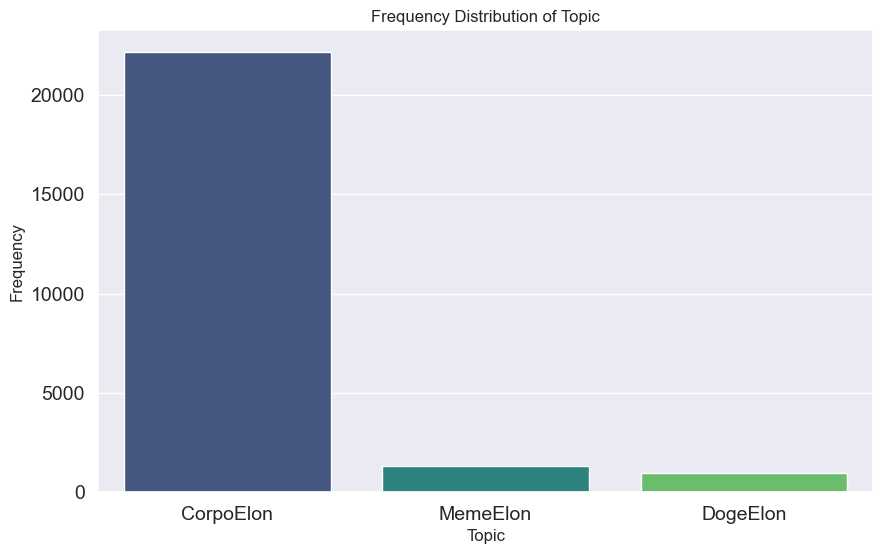

In [328]:
 #? occurence of each topic

# Count the occurrence of each topic
topic_counts = df['new_topic'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='viridis')
plt.title('Frequency Distribution of Topic')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.show()


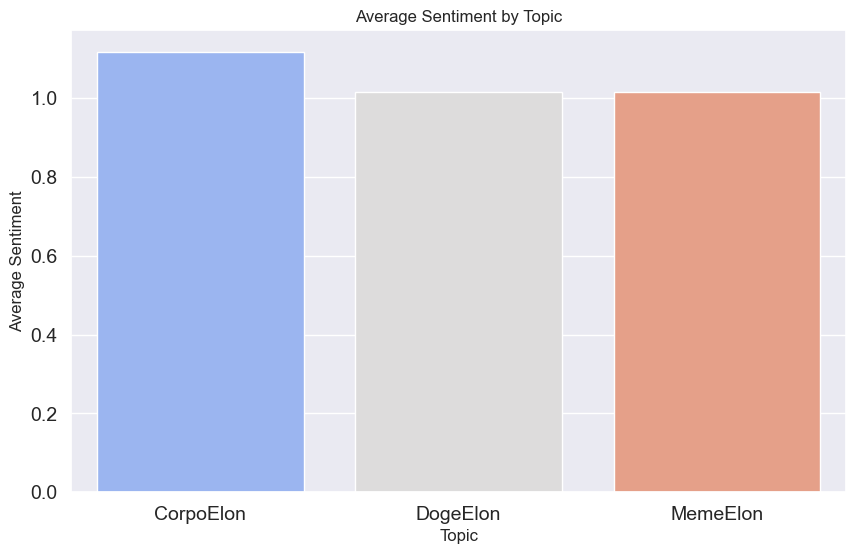

In [329]:
 #? sentiment by topic
# Calculate the average sentiment for each topic
avg_sentiment_by_topic = df.groupby('new_topic')['predictions'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sentiment_by_topic.index, y=avg_sentiment_by_topic.values, palette='coolwarm')
plt.title('Average Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment')
plt.show()


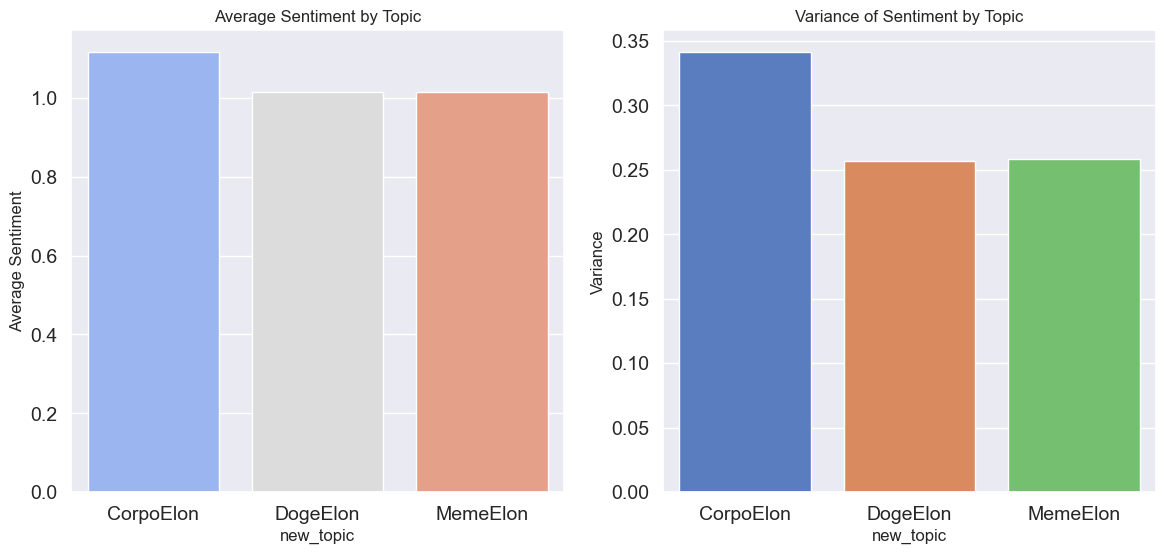

In [330]:
 #? varience of sentiment by topic
# Calculate mean and variance of sentiment for each topic
sentiment_stats_by_topic = df.groupby('new_topic')['predictions'].agg(['mean', 'var'])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=sentiment_stats_by_topic.index, y=sentiment_stats_by_topic['mean'], ax=axes[0], palette='coolwarm')
axes[0].set_title('Average Sentiment by Topic')
axes[0].set_ylabel('Average Sentiment')

sns.barplot(x=sentiment_stats_by_topic.index, y=sentiment_stats_by_topic['var'], ax=axes[1], palette='muted')
axes[1].set_title('Variance of Sentiment by Topic')
axes[1].set_ylabel('Variance')
plt.show()


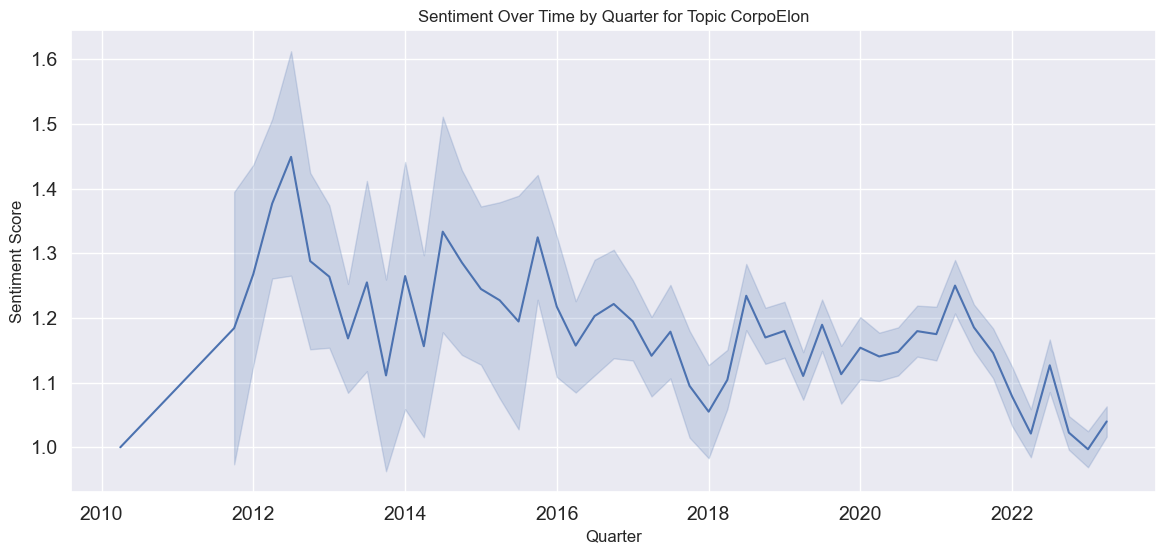

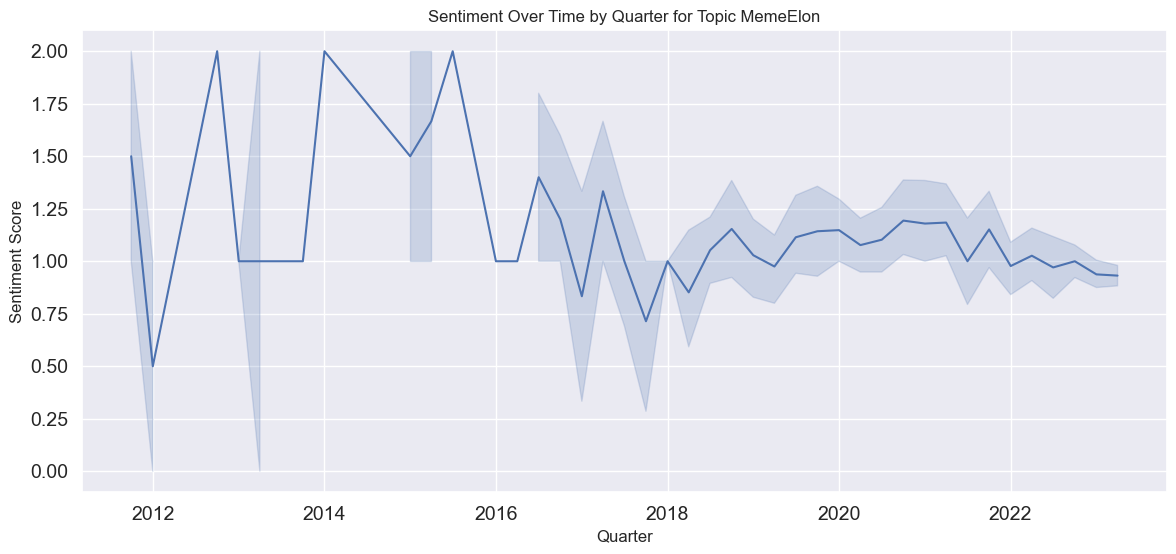

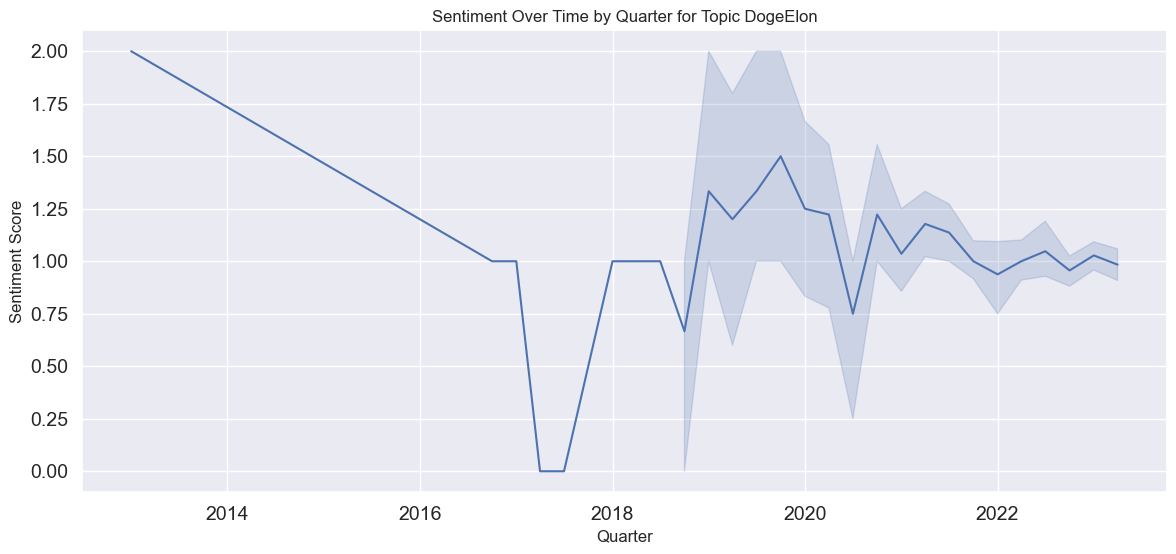

In [331]:
 #? topic sentiment over time
# Create a copy for quarter-based analysis
df_q = df.copy()

# Convert 'Datetime' to datetime format and then to period (quarter)
df_q['Datetime'] = pd.to_datetime(df_q['Datetime']).dt.to_period('Q')

# Convert Period back to datetime at the start of the period for plotting
df_q['Datetime'] = df_q['Datetime'].dt.start_time

# Create a plot for each topic
for topic in df_q['new_topic'].unique():
    subset = df_q[df_q['new_topic'] == topic]
    plt.figure(figsize=(14, 6))
    sns.lineplot(x='Datetime', y='predictions', data=subset)
    plt.title(f"Sentiment Over Time by Quarter for Topic {topic}")
    plt.ylabel('Sentiment Score')
    plt.xlabel('Quarter')
    plt.show()


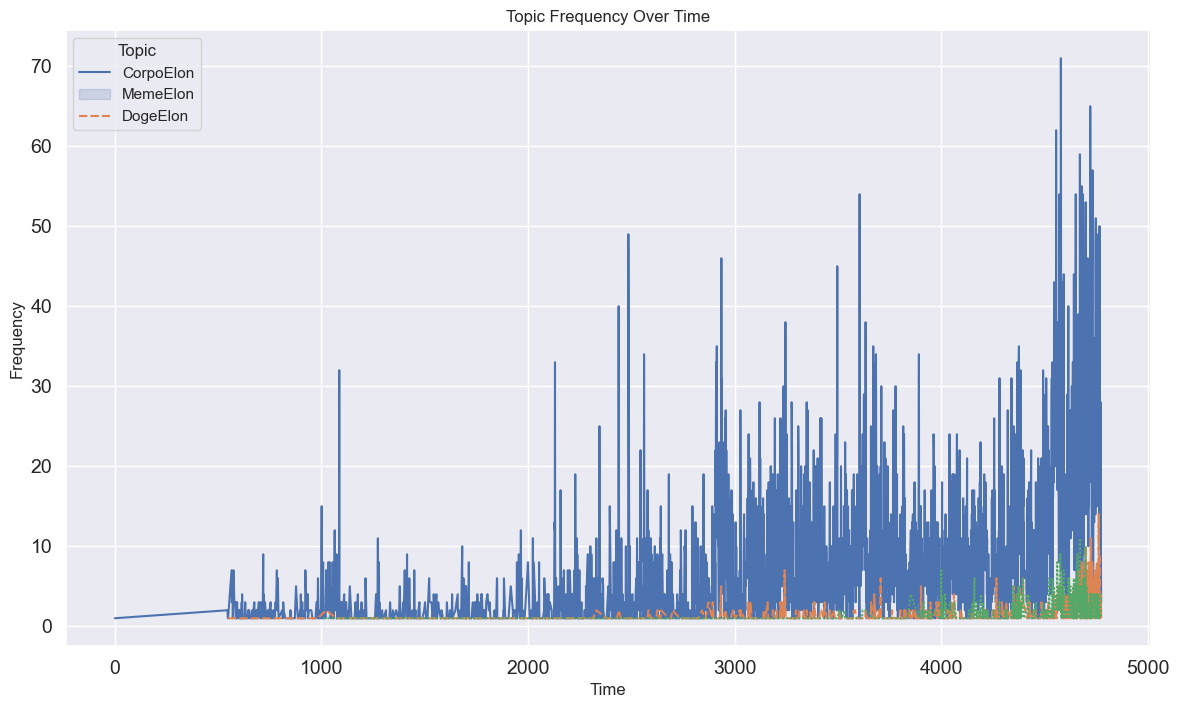

In [332]:
 #? sentiment by topic over time
# Convert 'Datetime' to datetime object if it's not
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Resample to get count per day (or week/month)
df_time = df.resample('D', on='Datetime').apply(lambda x: x['new_topic'].value_counts().to_dict())

# Convert to DataFrame for plotting
df_time = pd.DataFrame(list(df_time))

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_time)
plt.title('Topic Frequency Over Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend(title='Topic', labels=df_time.columns)
plt.show()


##### Mentions

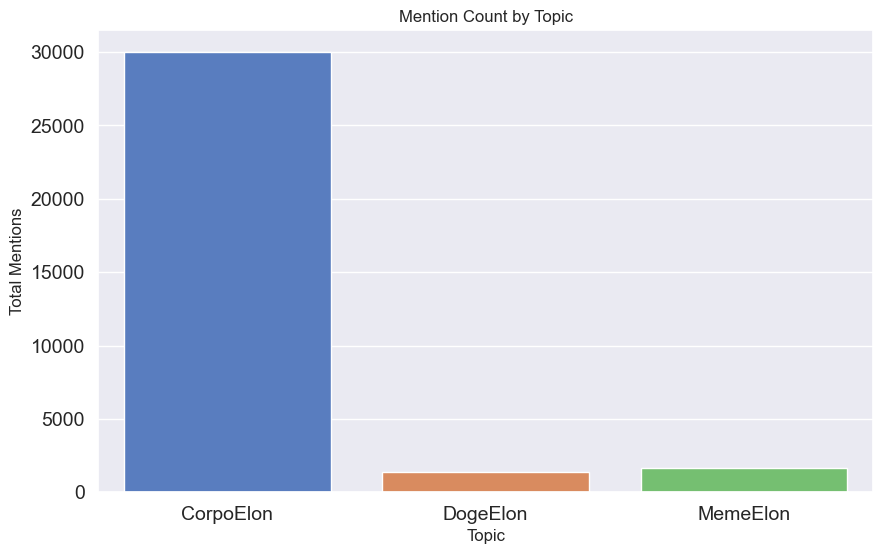

In [333]:
 #? mentions by topic
# Create a DataFrame that counts mentions by topic
mention_count_by_topic = df.groupby('new_topic')['mentions'].apply(lambda x: x.str.len().sum())

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mention_count_by_topic.index, y=mention_count_by_topic.values, palette='muted')
plt.title('Mention Count by Topic')
plt.xlabel('Topic')
plt.ylabel('Total Mentions')
plt.show()


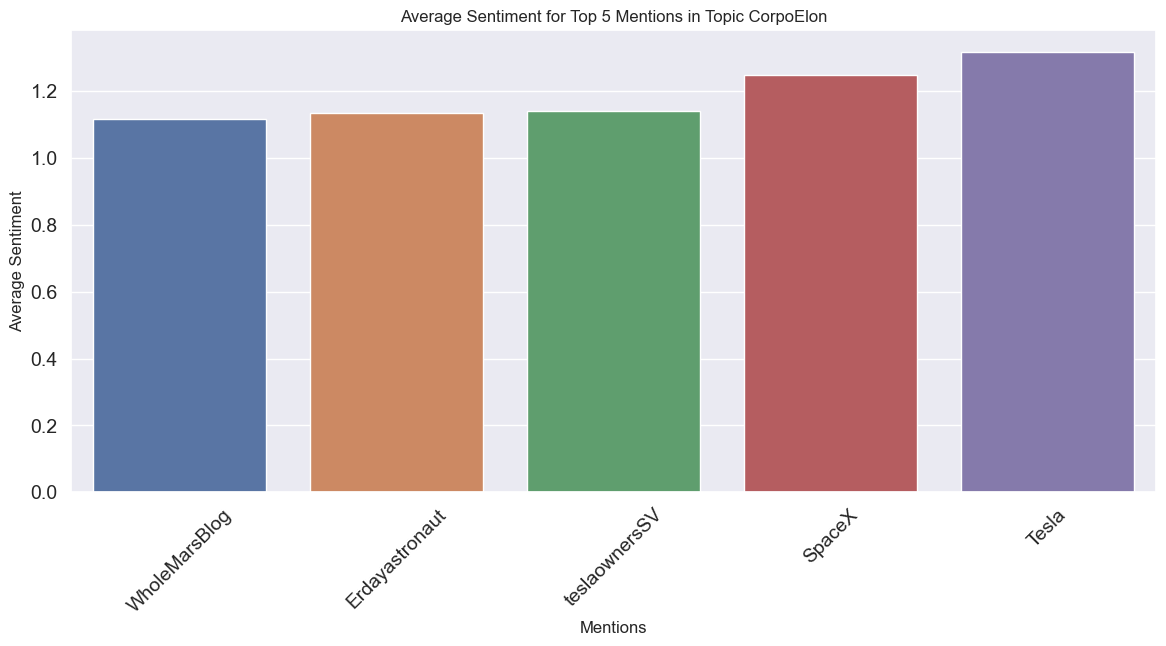

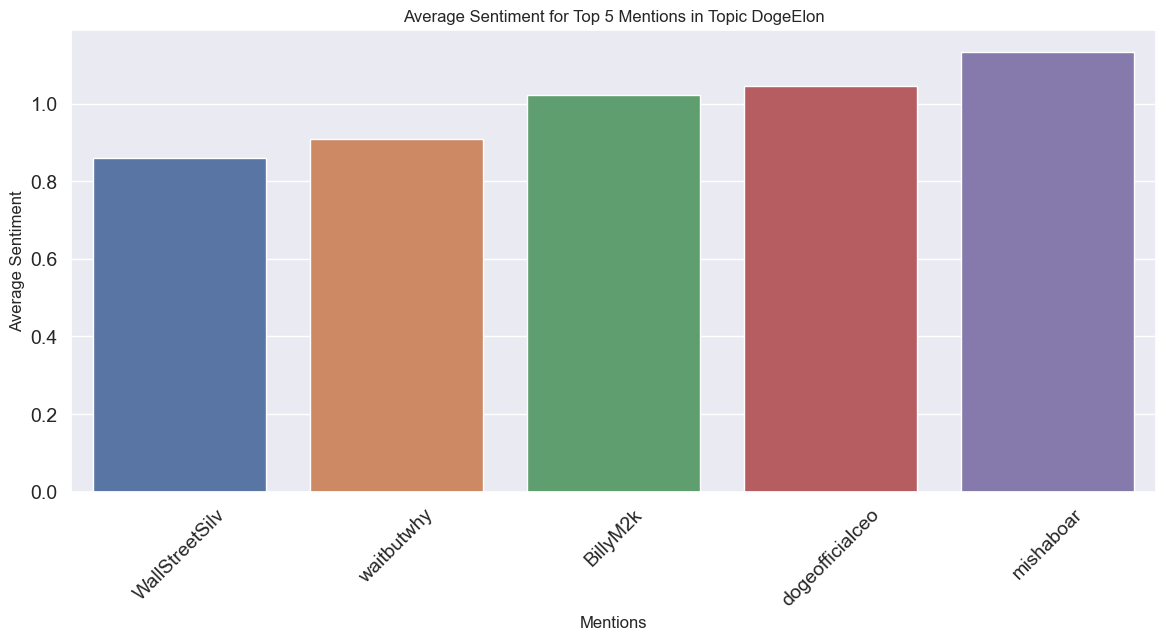

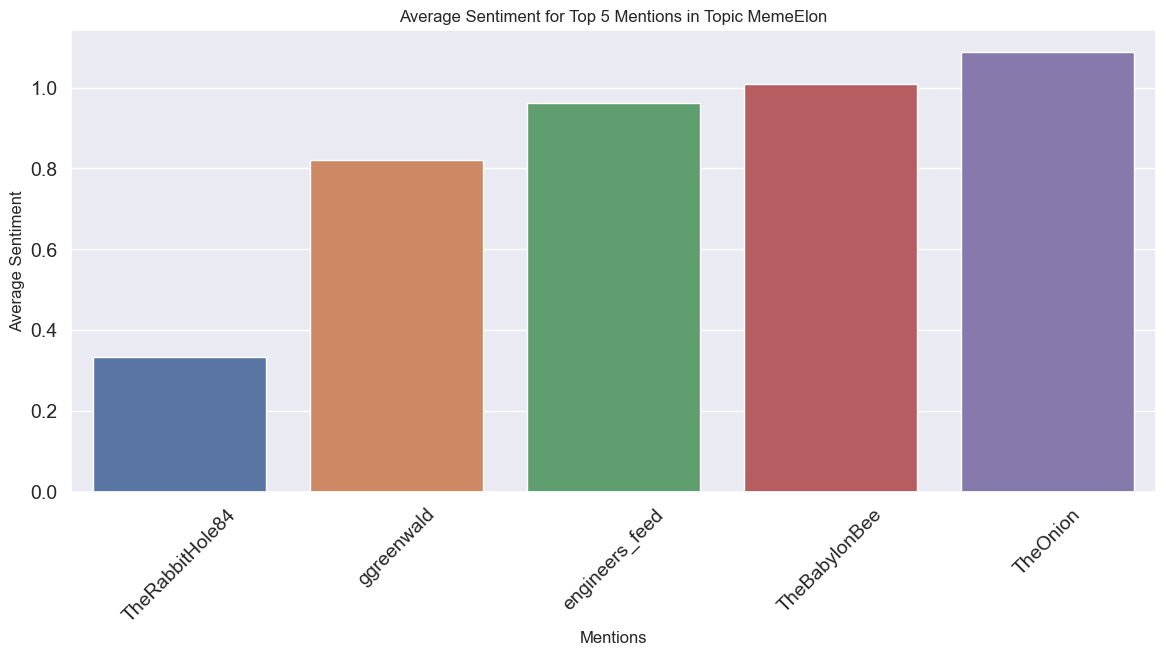

In [334]:
 #? sentiment by mention
df_copy = df.copy()

# Convert 'mentions' from string to list (if necessary)
df_copy['mentions'] = df_copy['mentions'].apply(eval) if isinstance(df_copy['mentions'].iloc[0], str) else df_copy['mentions']

# Explode the 'mentions' and group by 'new_topic' and 'mentions' to find mean sentiment
mean_sentiment_by_mention = df_copy.explode('mentions').groupby(['new_topic', 'mentions'])['predictions'].mean().reset_index()

# Count mentions for each topic
mention_count_by_topic = df_copy.explode('mentions').groupby(['new_topic', 'mentions']).size().reset_index(name='count')

# Sort and pick top 5 mentions for each topic
top5_mentions_by_topic = mention_count_by_topic.sort_values(['new_topic', 'count'], ascending=[True, False]).groupby('new_topic').head(5)

# Filter mean sentiment by top 5 mentions
filtered_mean_sentiment = pd.merge(mean_sentiment_by_mention, top5_mentions_by_topic, on=['new_topic', 'mentions'])

# Create a plot for each topic
for topic in filtered_mean_sentiment['new_topic'].unique():
    subset = filtered_mean_sentiment[filtered_mean_sentiment['new_topic'] == topic]
    plt.figure(figsize=(14, 6))
    sns.barplot(x='mentions', y='predictions', data=subset, order=subset.sort_values('predictions')['mentions'])
    plt.title(f"Average Sentiment for Top 5 Mentions in Topic {topic}")
    plt.ylabel('Average Sentiment')
    plt.xlabel('Mentions')
    plt.xticks(rotation=45)
    plt.show()


negative sentiment mentions

In [221]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Explode the 'mentions' list into separate rows
df_exploded = df_copy.explode('mentions')

# Group by 'mentions' and calculate the mean sentiment score and count
low_sentiment_mentions = df_exploded.groupby('mentions').agg({'predictions': 'mean', 'mentions': 'size'}).rename(columns={'predictions': 'mean_sentiment', 'mentions': 'mention_count'})

# Reset index and rename columns
low_sentiment_mentions.reset_index(inplace=True)

# Sort by sentiment score in ascending order and count in descending order, then take the top 5
top_5_low_sentiment_mentions = low_sentiment_mentions.sort_values(by=['mean_sentiment', 'mention_count'], ascending=[True, False]).head(50)

print(top_5_low_sentiment_mentions)


             mentions  mean_sentiment  mention_count
3902      TimFernholz             0.0              4
342       AskDrStupid             0.0              3
1420    FxzzOnTheBeat             0.0              3
2737    NoahShachtman             0.0              3
3510         Stanford             0.0              3
5351         erinbiba             0.0              3
7632    thedailybeast             0.0              3
207       AlexEpstein             0.0              2
216    AlexTheChemist             0.0              2
285        AndyKiersz             0.0              2
300    AnozieUdemezue             0.0              2
495        BiasedGirl             0.0              2
533     BleachTheLies             0.0              2
624   BusinessInsider             0.0              2
802         ClickHole             0.0              2
881         Crypt0men             0.0              2
1478  Gerashchenko_en             0.0              2
1490      GilesGraves             0.0         

overtime

In [232]:
df['mentions'].value_counts()

[]                                                       5272
[WholeMarsBlog]                                           350
[BillyM2k]                                                279
[teslaownersSV]                                           197
[cb_doge]                                                 131
                                                         ... 
[ignaciobelieres, oza_shiv, lrocket]                        1
[Aristot21520213, ray4tesla]                                1
[Erdayastronaut, PPathole, vincent13031925]                 1
[SamTwits, Erdayastronaut, PPathole, vincent13031925]       1
[jonlovett]                                                 1
Name: mentions, Length: 10265, dtype: int64

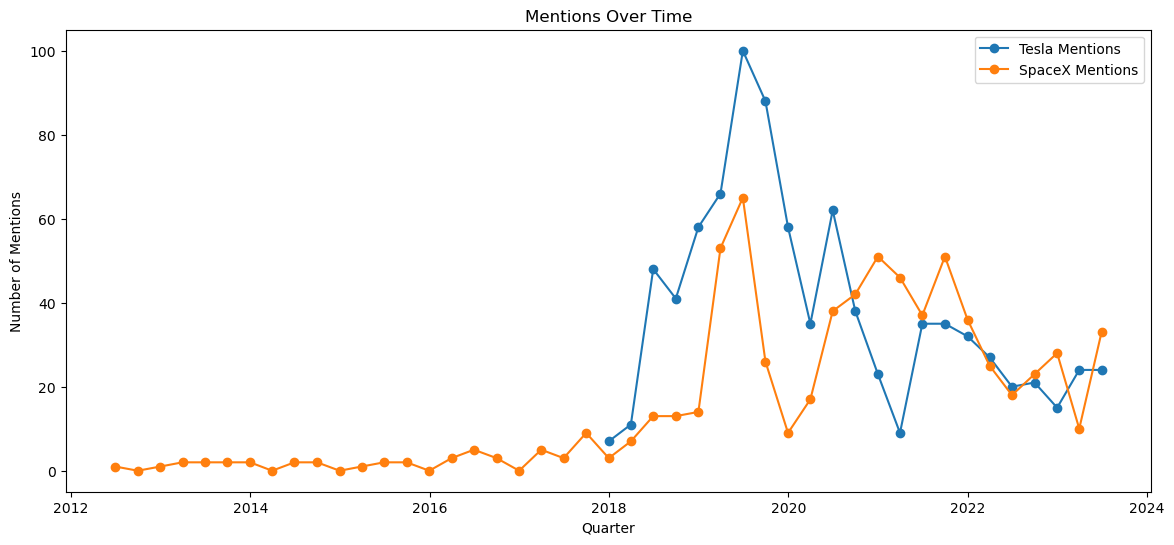

In [251]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_mentions_over_time(df, start_date, mentions_list):
    # Create a copy of the original DataFrame
    df_copy = df.copy()
    
    # Convert 'Datetime' to datetime format
    df_copy['Datetime'] = pd.to_datetime(df_copy['Datetime'])
    
    # Filter by start date
    df_copy = df_copy[df_copy['Datetime'] >= start_date]
    
    plt.figure(figsize=(14, 6))
    
    for mention in mentions_list:
        # Create a boolean column for each mention
        df_copy[f'mention_{mention}'] = df_copy['mentions'].apply(lambda x: mention in x if x else False)
        
        # Filter the DataFrame to only include mentions of the keyword
        mention_df = df_copy[df_copy[f'mention_{mention}']]
        
        # Resample to count mentions per quarter
        mention_resampled = mention_df.resample('Q', on='Datetime').count()['Tweet Id']
        
        # Plotting
        plt.plot(mention_resampled.index, mention_resampled.values, marker='o', label=f"{mention} Mentions")
    
    plt.title('Mentions Over Time')
    plt.xlabel('Quarter')
    plt.ylabel('Number of Mentions')
    plt.legend()
    plt.show()

# Sample call
plot_mentions_over_time(df, '2010-01-01', ['Tesla', 'SpaceX'])


trend compare


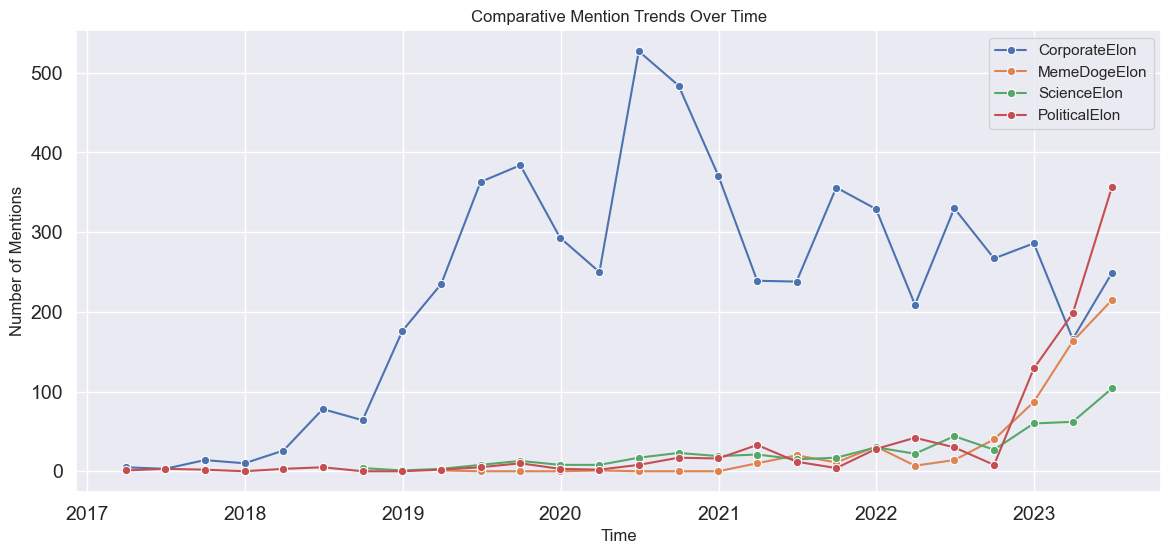

In [335]:
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def compare_mention_trends(df: pd.DataFrame, start_date: str, 
                           mention_list1: List[str], label1: str, 
                           mention_list2: List[str], label2: str,  
                           mention_list3: List[str], label3: str,
                           mention_list4: List[str], label4: str):
    df_copy = df.copy()
    df_copy['Datetime'] = pd.to_datetime(df_copy['Datetime'])
    
    # Filter by start date
    df_copy = df_copy[df_copy['Datetime'] >= start_date]
    
    # Initialize a dictionary to store the resampled data for each mention list
    resampled_data = {}
    
    for idx, mention_list in enumerate([mention_list1, mention_list2, mention_list3, mention_list4]):
        count = 0
        for mention in mention_list:
            df_copy[f'mention_{mention}'] = df_copy['mentions'].apply(lambda x: any(mention.lower() == m.lower() for m in x) if x is not None else False)
            
            # Set 'Datetime' as the index and resample
            mention_df = df_copy[df_copy[f'mention_{mention}']]
            mention_df.set_index('Datetime', inplace=True)
            mention_resampled = mention_df.resample('Q').count()['Tweet Id']
            
            # Ensure that the resampled series have the same index
            if count == 0:
                master_index = mention_resampled.index
                resampled_data[f'List{idx+1}'] = pd.Series(index=master_index, dtype='float64').fillna(0)
            
            # Add up the mentions for each list
            resampled_data[f'List{idx+1}'] = resampled_data[f'List{idx+1}'].add(mention_resampled, fill_value=0)
            count += 1
    
    # Create the plot
    plt.figure(figsize=(14, 6))
    
    sns.lineplot(x=resampled_data['List1'].index, y=resampled_data['List1'], marker='o', label=label1)
    sns.lineplot(x=resampled_data['List2'].index, y=resampled_data['List2'], marker='o', label=label2)
    sns.lineplot(x=resampled_data['List3'].index, y=resampled_data['List3'], marker='o', label=label3)
    sns.lineplot(x=resampled_data['List4'].index, y=resampled_data['List4'], marker='o', label=label4)
    
    plt.title('Comparative Mention Trends Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Mentions')
    plt.legend()
    plt.show()

# Sample call
compare_mention_trends(df, '2017-01-01', ['Tesla', 'SpaceX', 'Erdayastronaut', 'WholeMarsBlog', 
                                          'teslaownersSV', 'PPathole', 'flcnhvy', 'Teslarati', 
                                          'EvaFoxU', 'NASASpaceflight', 'Kristennetten', 
                                          'cleantechnica', 'SawyerMerritt', 'SciGuySpace', 
                                          'boringcompany', 'elonmusk', 'neuralink']
                                        , 'CorporateElon'
                                        
                                        , ['BillyMk', 'WallStreetSilv', 'dogeofficialceo',
                                           'mishaboar', 'StonksReddit', 
                                           'WSBChairman', 'cb_doge', 'unusual_whales', 
                                           'Austen', 'WatcherGuru', 'itsALLrisky', 'CoinDesk']
                                        , 'MemeDogeElon'
                                        
                                        , ['engineers_feed', 'TheRabbitHole84', 'ashleevance', 
                                           'andst7', 'growing_daniel', 'newscientist ', 
                                           'Liv_Boeree', 'WorldAndScience ', 'lexfridman' ]
                                        , 'ScienceElon'
                                        
                                        , ['TheBabylonBee', 'TheOnion', "sethdillon", "tuckercarlson", 
                                           "time", "alx", "thebabylonbee", 
                                           "thebabylonbee", "accurate", "ZubyMusic", "jordanbpeterson",
                                           'Not_the_Bee ', 'ggreenwald', "DavidSacks", 'waitbutwhy' ]
                                        , "PoliticalElon")


In [257]:
top5_mentions_by_topic = mention_count_by_topic.sort_values(['new_topic', 'count'], ascending=[True, False]).groupby('new_topic').head(15)
# where new_topic is the topic name

top5_mentions_by_topic["mentions"]

3482              Tesla
3270             SpaceX
1177     Erdayastronaut
3924      WholeMarsBlog
7173      teslaownersSV
2672           PPathole
5130            flcnhvy
3554          Teslarati
1206            EvaFoxU
2470    NASASpaceflight
2022      Kristennetten
4587            cb_doge
4658      cleantechnica
3131      SawyerMerritt
3140        SciGuySpace
7633           BillyM2k
7803     WallStreetSilv
7862    dogeofficialceo
7984         waitbutwhy
7924          mishaboar
7654         DavidSacks
7779       StonksReddit
7802        WSBChairman
7840            cb_doge
7981     unusual_whales
7914         lexfridman
7629             Austen
7804        WatcherGuru
7895        itsALLrisky
7646           CoinDesk
8365      TheBabylonBee
8372           TheOnion
8540         ggreenwald
8515     engineers_feed
8374    TheRabbitHole84
8449        ashleevance
8415          ZubyMusic
8439             andst7
8545     growing_daniel
8674       newscientist
8202         Liv_Boeree
8265        Not_

#### NMF on 2022-04-14 onwards

##### Sentiment after purchase twitter

In [271]:
# Define the event date
event_date = pd.to_datetime('2022-04-14')

# Divide the data into before and after
before_but_twitter = df[df['Datetime'] < event_date]
after_buy_twitter = df[df['Datetime'] >= event_date]

# Calculate the average sentiment for each topic before and after the event
avg_before = before_but_twitter.groupby('new_topic')['predictions'].mean()
avg_after = after_buy_twitter.groupby('new_topic')['predictions'].mean()

# Compare
comparison_df = pd.DataFrame({'Before_Event': avg_before, 'After_Event': avg_after})
print(comparison_df)


           Before_Event  After_Event
new_topic                           
CorpoElon      1.163751     1.032331
DogeElon       1.061069     0.998553
MemeElon       1.085386     0.957823


In [254]:
# Example usage
W, H, coherence, perplexity = topic_modeling(after_buy_twitter, 'clean_text_ner', n_components=3, init='random', random_state=42)

/var/folders/0g/bgp5y9nj4bl4bmptz0x4xrl40000gn/T/ipykernel_19196/3124252562.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text_list'] = df[text_column].apply(lambda x: x.split() if isinstance(x, str) else x)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [ ]:
# after twitter purchase we have a new group of topics
# nr 3 is Politico Elon

GOING FORWARD:
* kan göra alla samma analyser nu efter köpt twitter
  * KAN OCKSÅ GÅ DJUPARE PÅ DEM DÅLIGA SENTIEMTN MENTIONS HAN HAR
* eller tanka hem twitter timeseries och göra en sentiment analys på bara tweets som mentionar twitter och sedan koppla dem två
* 

## Stock Price Correlation?

---
# Testing Twitter API

In [ ]:
 #! REPLACE WITH OWN
bearer_token = 
 #! REPLACE WITH OWN

SyntaxError: invalid syntax (2760342695.py, line 2)

In [ ]:
# This will import the Twarc2 client and expansions class from twarc library and also the json library
from twarc import Twarc2, expansions
import json
# This is where you initialize the client with your own bearer token (replace the XXXXX with your own bearer token)
client = Twarc2(bearer_token=bearer_token)

### Get elons timeline

In [ ]:

def main():
    # This timeline functions gets the Tweet timeline for a specified user
    user_timeline = client.timeline(user="elonmusk")

    # Twarc returns all Tweets for the criteria set above, so we page through the results
    for page in user_timeline:
        # The Twitter API v2 returns the Tweet information and the user, media etc.  separately
        # so we use expansions.flatten to get all the information in a single JSON
        result = expansions.flatten(page)
        for tweet in result:
            # Here we are printing the full Tweet object JSON to the console
            print(json.dumps(tweet))


if __name__ == "__main__":
    main()


Unexpected HTTP response: <Response [403]>


HTTPError: 403 Client Error: Forbidden for url: https://api.twitter.com/2/users/by?tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2Clang%2Cpublic_metrics%2Ctext%2Cpossibly_sensitive%2Creferenced_tweets%2Creply_settings%2Csource%2Cwithheld%2Cedit_controls%2Cedit_history_tweet_ids&user.fields=created_at%2Cdescription%2Centities%2Cid%2Clocation%2Cname%2Cpinned_tweet_id%2Cprofile_image_url%2Cprotected%2Cpublic_metrics%2Curl%2Cusername%2Cverified%2Cverified_type%2Cwithheld&usernames=carlstedty